In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [5]:
# meme = pd.read_csv('../data/processed/meme.csv')
# ai = pd.read_csv('../data/processed/ai.csv')
# rwa = pd.read_csv('../data/processed/rwa.csv')
gaming = pd.read_csv('../data/processed/gaming.csv')
# meme.shape, ai.shape, rwa.shape, gaming.shape

In [6]:
# complete = pd.concat([meme, ai, rwa, gaming], axis=0)
complete = gaming
print(complete.shape)
complete.head()

(125654, 10)


timestamp      open      high       low     close        volume    name  \
0  1639526400  4.744375  5.317031  2.173027  3.078208  1.480910e+06  SENATE   
1  1639612800  3.090095  3.299374  2.405868  2.605501  6.657927e+05  SENATE   
2  1639699200  2.625207  3.096436  2.283871  2.741340  5.401045e+05  SENATE   
3  1639785600  2.771380  3.038297  2.604262  2.720898  2.294669e+05  SENATE   
4  1639872000  2.726673  2.815944  2.498097  2.724654  1.654344e+05  SENATE   

   symbol                                    id category  
0  SENATE  0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130   gaming  
1  SENATE  0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130   gaming  
2  SENATE  0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130   gaming  
3  SENATE  0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130   gaming  
4  SENATE  0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130   gaming

In [7]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125654 entries, 0 to 125653
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  125654 non-null  int64  
 1   open       125654 non-null  float64
 2   high       125654 non-null  float64
 3   low        125654 non-null  float64
 4   close      125654 non-null  float64
 5   volume     125654 non-null  float64
 6   name       125654 non-null  object 
 7   symbol     125654 non-null  object 
 8   id         125654 non-null  object 
 9   category   125654 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 9.6+ MB


In [8]:
duplicates = pd.read_csv('../data/raw/duplicates.csv')
print(duplicates.shape)
duplicates

(19, 4)


id           name  symbol category
0   0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130         SENATE  SENATE   gaming
1   0d8b00d2-9e0a-4489-891b-6e663a6fcd10          Turbo   TURBO       ai
2   1a5aa1bf-0512-4a7d-ac19-ddaccfbee99f     Katana Inu    KATA   gaming
3   1bc28038-aa5b-4e3d-9ad9-eaf8cbfed677        TokenFi   TOKEN     meme
4   1bc28038-aa5b-4e3d-9ad9-eaf8cbfed677        TokenFi   TOKEN       ai
5   1c1cd416-b027-4d73-9d4d-0a9edc63524d        Chromia     CHR   gaming
6   4885df43-d6b8-4aa2-ba26-245b24d09e50   Cere Network    CERE   gaming
7   68221f51-660f-4bed-88e4-680165a9be0c         Kadena     KDA   gaming
8   85ec7d3f-bc7a-4c7a-83c6-1685f18f42fb  Echelon Prime   PRIME   gaming
9   8b88329d-a168-4590-a664-110db3c90308      Phantasma    SOUL   gaming
10  8fd8e24d-3540-4b2c-903a-bb5f932ca054       CateCoin    CATE   gaming
11  9bb73af8-6ad9-4825-b17c-4ccc6a8fbcf8       Verasity     VRA   gaming
12  9ccb430a-8884-451c-b382-49a4a0c81f61   SafeMoon Inu     SMI   gaming
13  9fb6e340-7969-4047-86ae-d60cb11a70ad          FLOKI   FLOKI   gaming
14  c2b6aa74-ad3c-4b6d-8ddb-d649fadf27ae   Hoge Finance    HOGE   gaming
15  cb1eec26-bd87-4585-a3f1-568ad28d3ef2        Lumerin     LMR       ai
16  e399a238-6810-4ad4-93d9-24f110e85cdb      Akita Inu   AKITA   gaming
17  e5d6cff1-5f6b-4468-98d6-84354d1704d0    Victoria VR      VR   gaming
18  eb9e9e28-13b8-4355-a70b-d4ae2a4ba724      Oraichain    ORAI       ai

In [9]:
for index, row in duplicates.iterrows():
    id = row['id']
    category = row['category']
    complete = complete[~((complete['id'] == id) & (complete['category'] == category))]

In [10]:
# check amount of record grouping by id and show it's corresponding name
token_info = complete.groupby('id')['name'].value_counts()
token_info.describe()

count     103.000000
mean     1045.097087
std       560.569677
min       100.000000
25%       813.500000
50%      1078.000000
75%      1252.000000
max      3022.000000
Name: count, dtype: float64

In [11]:
token_info.head()

id                                    name          
049abaff-71e0-4b1a-bcee-942cb1630222  Dark Frontiers     375
06963e10-2042-41d3-9583-acb4135460dc  Mist              1179
0844705f-10ed-42ca-b483-914b7d59e351  Decentraland      2559
0889f611-0e32-4e5e-be44-d87dcf8bf9cf  Cornucopias        441
10e910bd-6f50-4085-bd78-fbbcde408d28  Biswap            1057
Name: count, dtype: int64

In [12]:
# get the ids from the ones that the value count is greater than 990
ids = token_info[token_info > 990].index.get_level_values(0).unique()
ids

Index(['06963e10-2042-41d3-9583-acb4135460dc',
       '0844705f-10ed-42ca-b483-914b7d59e351',
       '10e910bd-6f50-4085-bd78-fbbcde408d28',
       '126938ad-16e3-423a-8803-69d011694a48',
       '199c287f-3646-49cf-afd3-e17758f66cf0',
       '1ae14641-7365-4be1-9bb9-c86ab07715b3',
       '2150225f-b2f2-4b59-bc68-001aa8ae4666',
       '246715d6-065f-475e-8026-3e0a201c7e33',
       '24e85250-c2a7-4158-8e7d-244818085463',
       '30d41b9d-f8eb-4821-8a6e-9016bfd35023',
       '39268841-e3d8-40b3-8c30-6d6d5bb19bf4',
       '3a048f18-7aab-4abf-87bd-9f70572c5a9e',
       '3bb77159-e905-41bf-9321-ca414622cc2b',
       '3f548a16-866f-4e2c-b3e9-5df6d32d9083',
       '40aa59cc-c529-4ac7-a8b9-9c20fd8acae5',
       '42da9689-d86b-40b6-a637-ed56c564edc9',
       '4315622d-ca20-4ac1-96ee-8667d8b81797',
       '46f2989f-7eb3-49e4-a32f-5064d6f5b1dc',
       '4b435425-ad49-462e-89cb-e9c727c3dc50',
       '50d82ac0-c63a-4c7b-9f7b-d6113ae46617',
       '52b9da0d-1cb2-4de2-bcf2-1b43cbb584c6',
       '57d1a

In [13]:
# filter the complete dataset with the ids that have more than 990 records
filtered = complete[complete['id'].isin(ids)]
print(filtered.shape)
filtered.head()

(91631, 10)


timestamp      open      high       low     close        volume  name  \
1410  1626220800  0.011649  0.011649  0.011647  0.011647     70.185122  Mist   
1411  1626825600  0.062068  0.062071  0.062068  0.062071    707.952893  Mist   
1412  1626912000  0.080175  0.088427  0.080175  0.086998   8351.780213  Mist   
1413  1626998400  0.097680  0.107641  0.097680  0.105690  16235.237605  Mist   
1414  1627084800  0.120923  0.206081  0.120923  0.205990  69534.522595  Mist   

     symbol                                    id category  
1410   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1411   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1412   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1413   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1414   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming

In [14]:
# get the first timestamp for each id
first_timestamp = filtered.groupby('id').timestamp.min()
print(first_timestamp.shape)
first_timestamp.head()

(69,)


id
06963e10-2042-41d3-9583-acb4135460dc    1626220800
0844705f-10ed-42ca-b483-914b7d59e351    1507939200
10e910bd-6f50-4085-bd78-fbbcde408d28    1622678400
126938ad-16e3-423a-8803-69d011694a48    1639440000
199c287f-3646-49cf-afd3-e17758f66cf0    1640649600
Name: timestamp, dtype: int64

In [15]:
first_timestamp.sort_values()

id
57d1ac75-9212-45fc-9caa-2c0790c48398    1440460800
0844705f-10ed-42ca-b483-914b7d59e351    1507939200
39268841-e3d8-40b3-8c30-6d6d5bb19bf4    1509494400
7a532850-9ec9-4780-94ad-d2759dc1c5cf    1516924800
46f2989f-7eb3-49e4-a32f-5064d6f5b1dc    1519948800
                                           ...    
c5e016fd-f608-47bc-b5a9-d326135a9896    1639526400
4b435425-ad49-462e-89cb-e9c727c3dc50    1639612800
fc58d32a-af0e-43db-be43-2ad2f257151c    1640131200
199c287f-3646-49cf-afd3-e17758f66cf0    1640649600
c2973207-8df8-4210-82e7-1693d55c7ec5    1640908800
Name: timestamp, Length: 69, dtype: int64

In [16]:
# show the minimum timestamp for all
max_min_timestamp = first_timestamp.max()
print(max_min_timestamp, pd.to_datetime(max_min_timestamp, unit='s'))

1640908800 2021-12-31 00:00:00


In [17]:
# in complete check in how many rows the timestamp is 1409011200
filtered = filtered[filtered.timestamp == max_min_timestamp]['id']

In [18]:
# from complete just remain the rows that are in filtered
complete = complete[complete['id'].isin(filtered)]
print(complete.shape)
complete.head()

(91631, 10)


timestamp      open      high       low     close        volume  name  \
1410  1626220800  0.011649  0.011649  0.011647  0.011647     70.185122  Mist   
1411  1626825600  0.062068  0.062071  0.062068  0.062071    707.952893  Mist   
1412  1626912000  0.080175  0.088427  0.080175  0.086998   8351.780213  Mist   
1413  1626998400  0.097680  0.107641  0.097680  0.105690  16235.237605  Mist   
1414  1627084800  0.120923  0.206081  0.120923  0.205990  69534.522595  Mist   

     symbol                                    id category  
1410   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1411   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1412   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1413   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1414   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming

In [19]:
token_info2 = complete.groupby('id')['name'].value_counts()
token_info2.describe()

count      69.000000
mean     1327.985507
std       427.745165
min       996.000000
25%      1078.000000
50%      1179.000000
75%      1332.000000
max      3022.000000
Name: count, dtype: float64

In [20]:
token_info2

id                                    name              
06963e10-2042-41d3-9583-acb4135460dc  Mist                  1179
0844705f-10ed-42ca-b483-914b7d59e351  Decentraland          2559
10e910bd-6f50-4085-bd78-fbbcde408d28  Biswap                1057
126938ad-16e3-423a-8803-69d011694a48  Voxies                1037
199c287f-3646-49cf-afd3-e17758f66cf0  NFT Worlds            1019
                                                            ... 
e6ca0755-75f7-41c1-b354-4a0de9867c0b  Yield Guild Games     1176
ee667b5c-2eed-417a-b472-cf7a5af44a8f  WEMIX                 1139
f14d3862-f857-4705-8fda-40da9c7aa198  Binamon               1176
f5bf148f-d833-408a-83eb-50e12d2139ee  MARS4                 1083
fc58d32a-af0e-43db-be43-2ad2f257151c  Guild of Guardians    1029
Name: count, Length: 69, dtype: int64

In [21]:
complete.duplicated(['id', 'timestamp']).sum()

0

In [22]:
complete['timestamp'] = pd.to_datetime(complete['timestamp'], unit='s')
complete.head()

timestamp      open      high       low     close        volume  name  \
1410 2021-07-14  0.011649  0.011649  0.011647  0.011647     70.185122  Mist   
1411 2021-07-21  0.062068  0.062071  0.062068  0.062071    707.952893  Mist   
1412 2021-07-22  0.080175  0.088427  0.080175  0.086998   8351.780213  Mist   
1413 2021-07-23  0.097680  0.107641  0.097680  0.105690  16235.237605  Mist   
1414 2021-07-24  0.120923  0.206081  0.120923  0.205990  69534.522595  Mist   

     symbol                                    id category  
1410   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1411   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1412   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1413   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1414   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming

In [23]:
# just remain the rows with timestamp greater or equal than 1641859200
complete = complete[complete.timestamp >= pd.to_datetime(max_min_timestamp, unit='s')]
print(complete.shape)
complete.head()

(68964, 10)


timestamp      open      high       low     close        volume  name  \
1574 2021-12-31  0.101686  0.108547  0.098323  0.101184  1.071389e+06  Mist   
1575 2022-01-01  0.101140  0.108549  0.087685  0.092674  1.562933e+06  Mist   
1576 2022-01-02  0.092658  0.101120  0.090671  0.098038  9.455574e+05  Mist   
1577 2022-01-03  0.098048  0.114775  0.084847  0.098985  1.851625e+06  Mist   
1578 2022-01-04  0.098520  0.106522  0.064278  0.074541  4.346944e+06  Mist   

     symbol                                    id category  
1574   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1575   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1576   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1577   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1578   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming

In [24]:
# reset the index
complete.reset_index(drop=True, inplace=True)

In [25]:
complete.head()

timestamp      open      high       low     close        volume  name  \
0 2021-12-31  0.101686  0.108547  0.098323  0.101184  1.071389e+06  Mist   
1 2022-01-01  0.101140  0.108549  0.087685  0.092674  1.562933e+06  Mist   
2 2022-01-02  0.092658  0.101120  0.090671  0.098038  9.455574e+05  Mist   
3 2022-01-03  0.098048  0.114775  0.084847  0.098985  1.851625e+06  Mist   
4 2022-01-04  0.098520  0.106522  0.064278  0.074541  4.346944e+06  Mist   

  symbol                                    id category  
0   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
2   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
3   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming  
4   MIST  06963e10-2042-41d3-9583-acb4135460dc   gaming

In [26]:
# Data manipulation
# ==============================================================================
import sys
import os
import warnings
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from statsmodels.graphics.tsaplots import plot_acf

# Modelling and Forecasting
# ==============================================================================
import sklearn
import skforecast
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import  HistGradientBoostingRegressor
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import bayesian_search_forecaster
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import bayesian_search_forecaster_multiseries
from skforecast.model_selection_multiseries import select_features_multiseries
from skforecast.plot import set_dark_theme
from skforecast.preprocessing import series_long_to_dict
from skforecast.preprocessing import exog_long_to_dict

# Warnings configuration
# ==============================================================================
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m'
print(f"{color}Version skforecast: {skforecast.__version__}")
print(f"{color}Version scikit-learn: {sklearn.__version__}")
print(f"{color}Version pandas: {pd.__version__}")
print(f"{color}Version numpy: {np.__version__}")

Version skforecast: 0.13.0
Version scikit-learn: 1.5.2
Version pandas: 2.2.3
Version numpy: 1.26.4


c:\Users\andre\miniconda3\envs\crypto-model\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
# #standardize close in complete
# scaler = StandardScaler()
# complete['close'] = scaler.fit_transform(complete[['close']])
# complete.head()
# standardize open, high, low, close and volume
scaler = StandardScaler()
complete[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(complete[['open', 'high', 'low', 'close', 'volume']])
complete.head()

timestamp      open      high       low     close    volume  name symbol  \
0 2021-12-31 -0.115302 -0.115808 -0.115095 -0.115634 -0.171645  Mist   MIST   
1 2022-01-01 -0.115320 -0.115808 -0.115456 -0.115913 -0.161076  Mist   MIST   
2 2022-01-02 -0.115596 -0.116042 -0.115354 -0.115737 -0.174351  Mist   MIST   
3 2022-01-03 -0.115421 -0.115611 -0.115552 -0.115706 -0.154869  Mist   MIST   
4 2022-01-04 -0.115405 -0.115872 -0.116249 -0.116509 -0.101215  Mist   MIST   

                                     id category  
0  06963e10-2042-41d3-9583-acb4135460dc   gaming  
1  06963e10-2042-41d3-9583-acb4135460dc   gaming  
2  06963e10-2042-41d3-9583-acb4135460dc   gaming  
3  06963e10-2042-41d3-9583-acb4135460dc   gaming  
4  06963e10-2042-41d3-9583-acb4135460dc   gaming

In [28]:
series = complete[['timestamp', 'id', 'name', 'close']]
exog = complete[['timestamp', 'id', 'open', 'high', 'low', 'volume']]
series.shape, exog.shape

((68964, 4), (68964, 6))

In [29]:
# do one hot encode for category
# exog = pd.get_dummies(exog, columns=['category'], drop_first=True, dtype=np.float64)

In [30]:
exog.head()

timestamp                                    id      open      high  \
0 2021-12-31  06963e10-2042-41d3-9583-acb4135460dc -0.115302 -0.115808   
1 2022-01-01  06963e10-2042-41d3-9583-acb4135460dc -0.115320 -0.115808   
2 2022-01-02  06963e10-2042-41d3-9583-acb4135460dc -0.115596 -0.116042   
3 2022-01-03  06963e10-2042-41d3-9583-acb4135460dc -0.115421 -0.115611   
4 2022-01-04  06963e10-2042-41d3-9583-acb4135460dc -0.115405 -0.115872   

        low    volume  
0 -0.115095 -0.171645  
1 -0.115456 -0.161076  
2 -0.115354 -0.174351  
3 -0.115552 -0.154869  
4 -0.116249 -0.101215

In [31]:
exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68964 entries, 0 to 68963
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  68964 non-null  datetime64[ns]
 1   id         68964 non-null  object        
 2   open       68964 non-null  float64       
 3   high       68964 non-null  float64       
 4   low        68964 non-null  float64       
 5   volume     68964 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.2+ MB


In [32]:
# series_dict = series_long_to_dict(
#     data      = complete,
#     series_id = 'id',
#     index     = 'timestamp',
#     values    = 'close',
#     freq      = 'D'
# )

# series_dict = series_long_to_dict(
#     data      = complete,
#     series_id = 'id',
#     index     = 'timestamp',
#     values    = 'close',
#     freq      = 'D'
# )

# exog_dict = exog_long_to_dict(
#     data      = exog,
#     series_id = 'id',
#     index     = 'timestamp',
#     freq      = 'D'
# )

features = ['close', 'open', 'high', 'low']

series_dict = {feature: series_long_to_dict(
                 data=complete, 
                 series_id='id', 
                 index='timestamp', 
                 values=feature, 
                 freq='D') for feature in features}

# exog_dict = {feature: exog_long_to_dict(
#                  data=exog, 
#                  series_id='id', 
#                  index='timestamp', 
#                  freq='D') for feature in features}

In [33]:
# end_train = '2024-01-01 00:00:00'
# series_dict_train = {k: v.loc[: end_train,] for k, v in series_dict.items()}
# exog_dict_train   = {k: v.loc[: end_train,] for k, v in exog_dict.items()}
# series_dict_test  = {k: v.loc[end_train:,] for k, v in series_dict.items()}
# exog_dict_test    = {k: v.loc[end_train:,] for k, v in exog_dict.items()}

In [34]:
# set_dark_theme()
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# # Ensure there are enough colors
# if len(colors) < len(series_dict):
#     colors = colors * (len(series_dict) // len(colors) + 1)
# fig, axs = plt.subplots(20, 1, figsize=(20, 10), sharex=True)
# for i, s in enumerate(list(series_dict.values())[:20]):
#     axs[i].plot(s, label=s.name, color=colors[i])
#     axs[i].legend(loc='upper right', fontsize=8)
#     axs[i].tick_params(axis='both', labelsize=8)
#     axs[i].axvline(pd.to_datetime(end_train) , color='white', linestyle='--', linewidth=1) # End train

In [35]:
# for k in series_dict.keys():
#     print(f"{k}:")
#     try:
#         print(
#             f"\tTrain: len={len(series_dict_train[k])}, {series_dict_train[k].index[0]}"
#             f" --- {series_dict_train[k].index[-1]}"
#         )
#     except:
#         print(f"\tTrain: len=0")
#     try:
#         print(
#             f"\tTest : len={len(series_dict_test[k])}, {series_dict_test[k].index[0]}"
#             f" --- {series_dict_test[k].index[-1]}"
#         )
#     except:
#         print(f"\tTest : len=0")

In [36]:
# for k in series_dict.keys():
#     print(f"{k}:")
#     try:
#         print(f"\t{exog_dict[k].columns.to_list()}")
#     except:
#         print(f"\tNo exogenous variables")

In [37]:
regressor = HistGradientBoostingRegressor(random_state=123, max_depth=5)
forecaster = ForecasterAutoregMultiSeries(
                regressor          = regressor,
                lags               = 14,
                encoding           = "ordinal",
                dropna_from_series = False
            )

# forecaster.fit(series=series_dict_train, exog=exog_dict_train , suppress_warnings=True)
# forecaster

In [38]:
for feature in features:
    forecaster.fit(series=series_dict[feature], suppress_warnings=True)

In [39]:
steps_ahead = 60
predictions_x_days = forecaster.predict(steps=steps_ahead)

In [40]:
predictions_x_days

06963e10-2042-41d3-9583-acb4135460dc  \
2024-10-16                             -0.118032   
2024-10-17                             -0.118032   
2024-10-18                             -0.118009   
2024-10-19                             -0.118009   
2024-10-20                             -0.117965   
2024-10-21                             -0.117965   
2024-10-22                             -0.117905   
2024-10-23                             -0.117841   
2024-10-24                             -0.117841   
2024-10-25                             -0.117841   
2024-10-26                             -0.117841   
2024-10-27                             -0.117807   
2024-10-28                             -0.117807   
2024-10-29                             -0.117807   
2024-10-30                             -0.117807   
2024-10-31                             -0.117746   
2024-11-01                             -0.117746   
2024-11-02                             -0.117746   
2024-11-03                             -0.117746   
2024-11-04                             -0.117662   
2024-11-05                             -0.117662   
2024-11-06                             -0.117564   
2024-11-07                             -0.117480   
2024-11-08                             -0.117480   
2024-11-09                             -0.117480   
2024-11-10                             -0.117480   
2024-11-11                             -0.117480   
2024-11-12                             -0.117480   
2024-11-13                             -0.117480   
2024-11-14                             -0.117480   
2024-11-15                             -0.117480   
2024-11-16                             -0.117480   
2024-11-17                             -0.117480   
2024-11-18                             -0.117480   
2024-11-19                             -0.117480   
2024-11-20                             -0.117480   
2024-11-21                             -0.117480   
2024-11-22                             -0.117480   
2024-11-23                             -0.117480   
2024-11-24                             -0.117480   
2024-11-25                             -0.117480   
2024-11-26                             -0.117480   
2024-11-27                             -0.117480   
2024-11-28                             -0.117480   
2024-11-29                             -0.117480   
2024-11-30                             -0.117480   
2024-12-01                             -0.117480   
2024-12-02                             -0.117480   
2024-12-03                             -0.117480   
2024-12-04                             -0.117480   
2024-12-05                             -0.117480   
2024-12-06                             -0.117480   
2024-12-07                             -0.117480   
2024-12-08                             -0.117480   
2024-12-09                             -0.117480   
2024-12-10                             -0.117480   
2024-12-11                             -0.117480   
2024-12-12                             -0.117480   
2024-12-13                             -0.117480   
2024-12-14                             -0.117480   

            0844705f-10ed-42ca-b483-914b7d59e351  \
2024-10-16                              -0.10836   
2024-10-17                              -0.10836   
2024-10-18                              -0.10836   
2024-10-19                              -0.10836   
2024-10-20                              -0.10836   
2024-10-21                              -0.10836   
2024-10-22                              -0.10836   
2024-10-23                              -0.10836   
2024-10-24                              -0.10836   
2024-10-25                              -0.10836   
2024-10-26                              -0.10836   
2024-10-27                              -0.10836   
2024-10-28                              -0.10836   
2024-10-29                              -0.10836   
2024-10-30                              -0.10836   
2024-10

In [41]:
series_dict

{'close': {'06963e10-2042-41d3-9583-acb4135460dc': 2021-12-31   -0.115634
  2022-01-01   -0.115913
  2022-01-02   -0.115737
  2022-01-03   -0.115706
  2022-01-04   -0.116509
                  ...   
  2024-10-11   -0.118864
  2024-10-12   -0.118867
  2024-10-13   -0.118867
  2024-10-14   -0.118858
  2024-10-15   -0.118863
  Freq: D, Name: 06963e10-2042-41d3-9583-acb4135460dc, Length: 1020, dtype: float64,
  '0844705f-10ed-42ca-b483-914b7d59e351': 2021-12-31   -0.011753
  2022-01-01   -0.009089
  2022-01-02   -0.009350
  2022-01-03   -0.012237
  2022-01-04   -0.014730
                  ...   
  2024-10-11   -0.109305
  2024-10-12   -0.109170
  2024-10-13   -0.109260
  2024-10-14   -0.108789
  2024-10-15   -0.108896
  Freq: D, Name: 0844705f-10ed-42ca-b483-914b7d59e351, Length: 1020, dtype: float64,
  '10e910bd-6f50-4085-bd78-fbbcde408d28': 2021-12-31   -0.085072
  2022-01-01   -0.083902
  2022-01-02   -0.083523
  2022-01-03   -0.082763
  2022-01-04   -0.085386
                  ...   
 

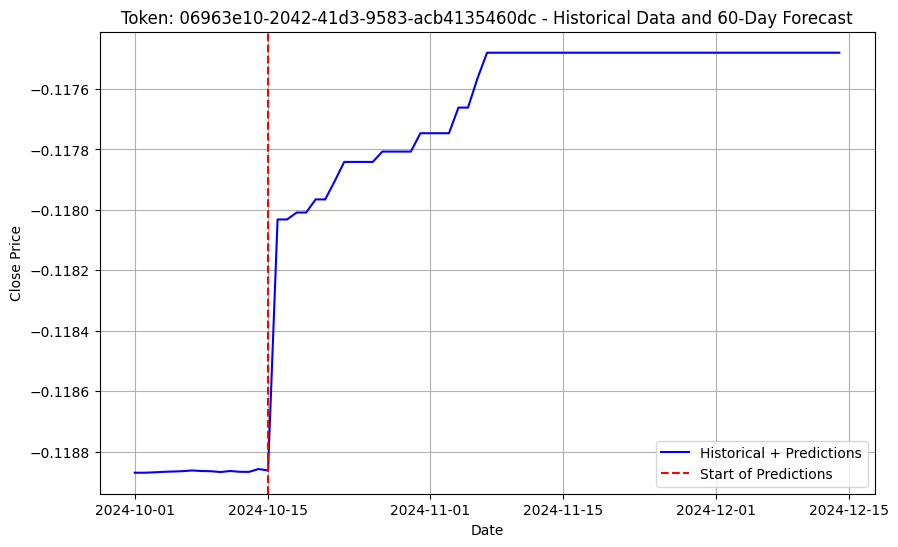

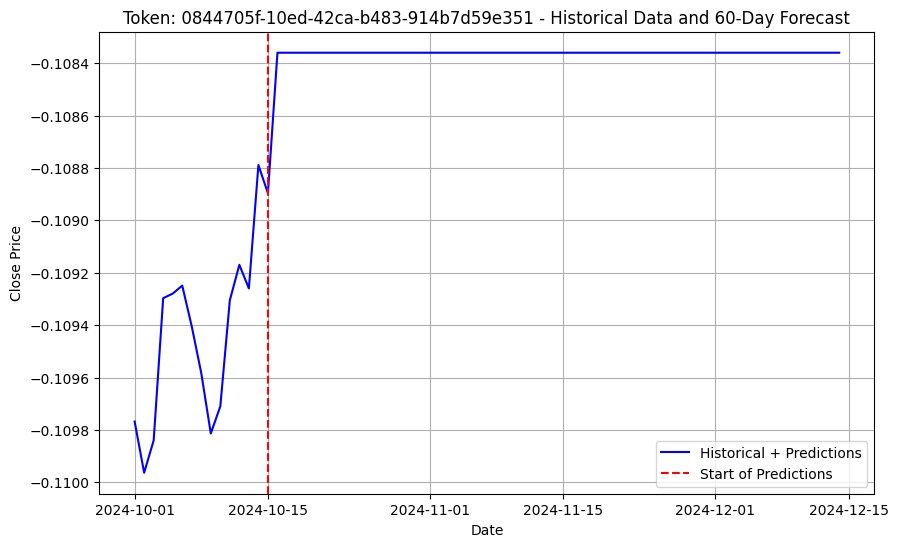

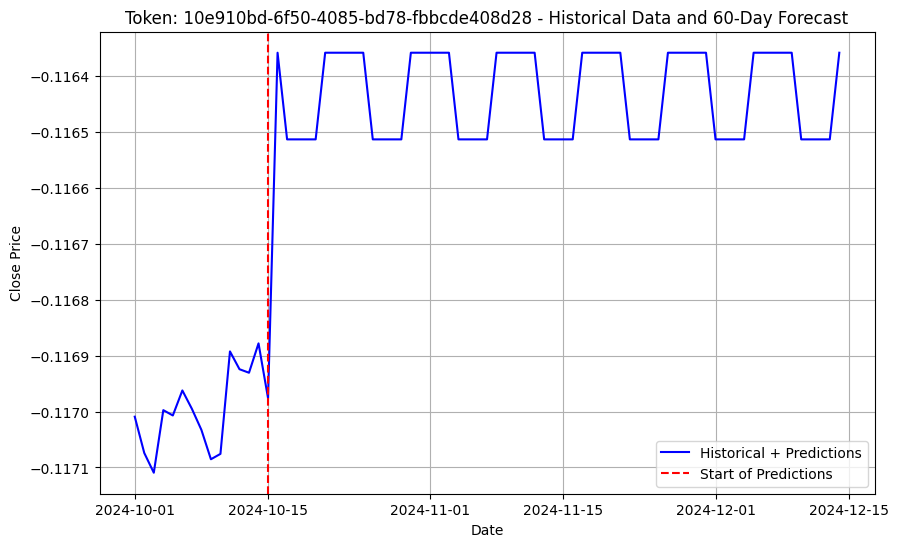

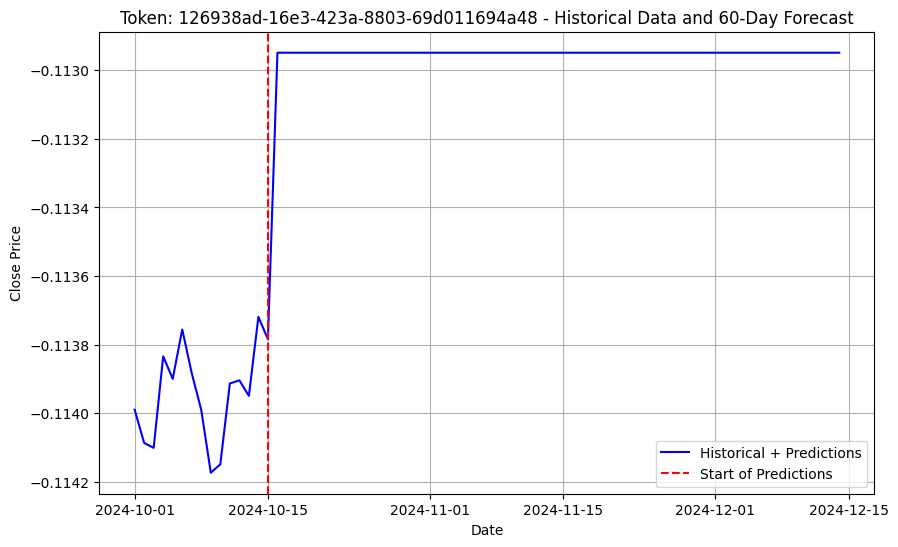

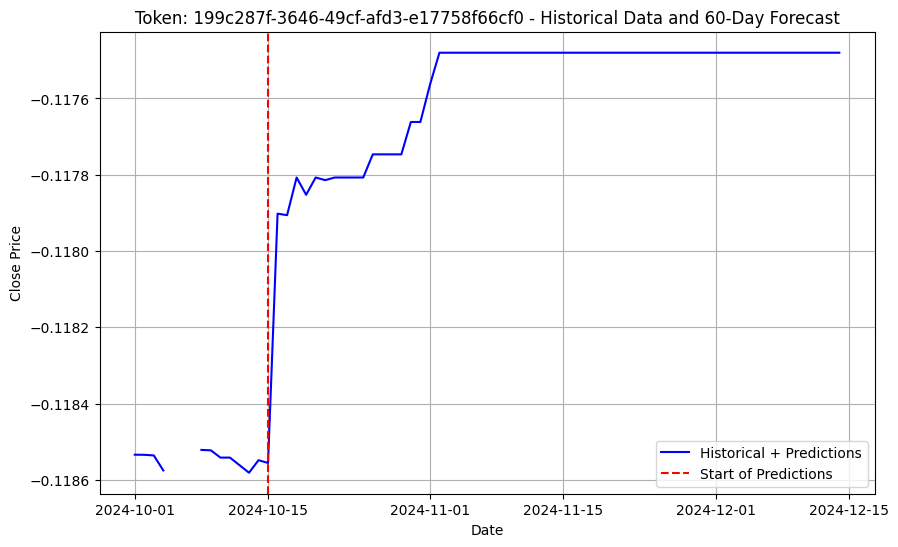

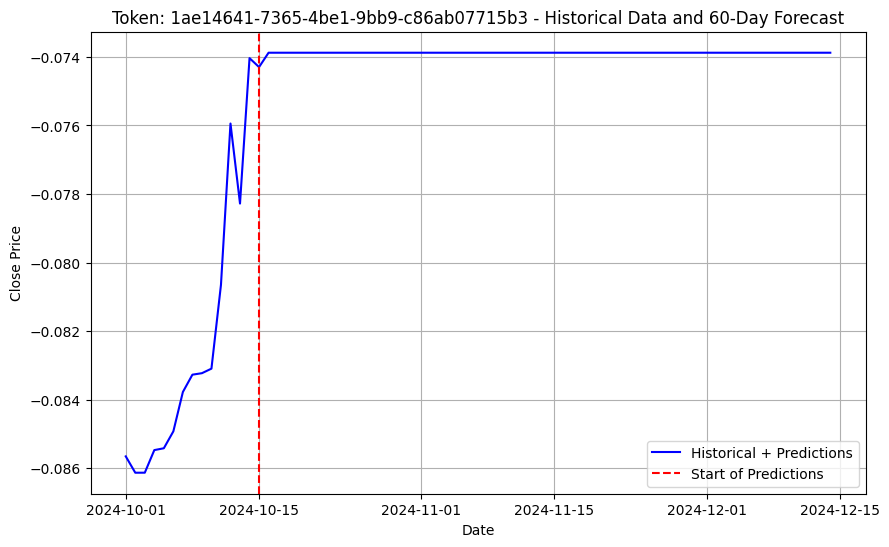

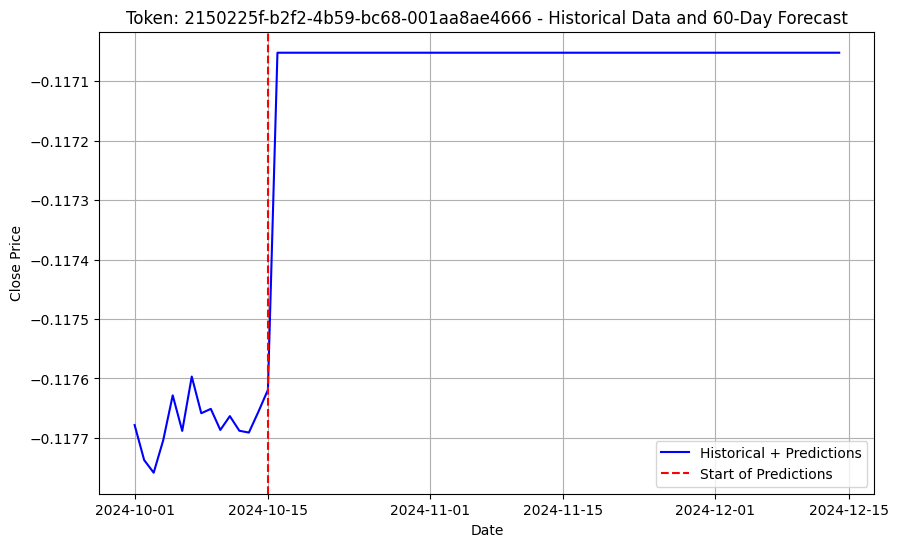

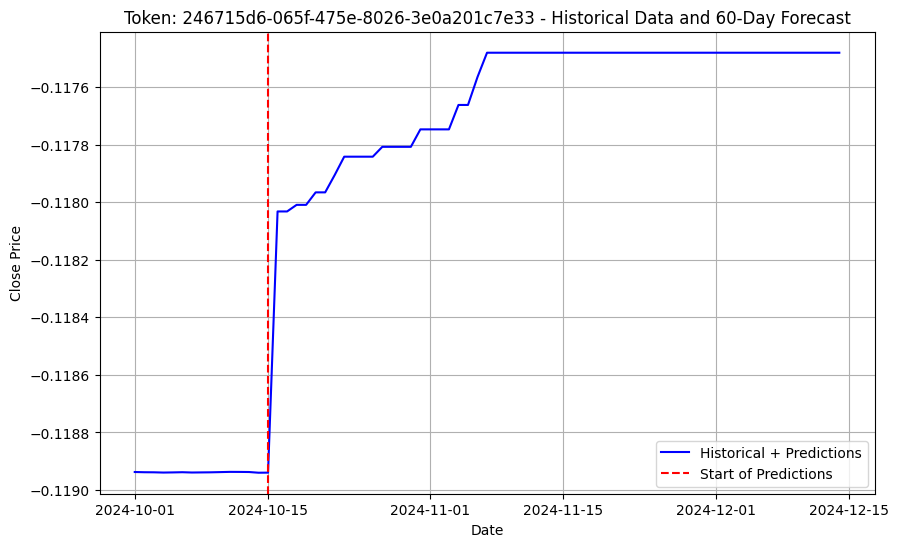

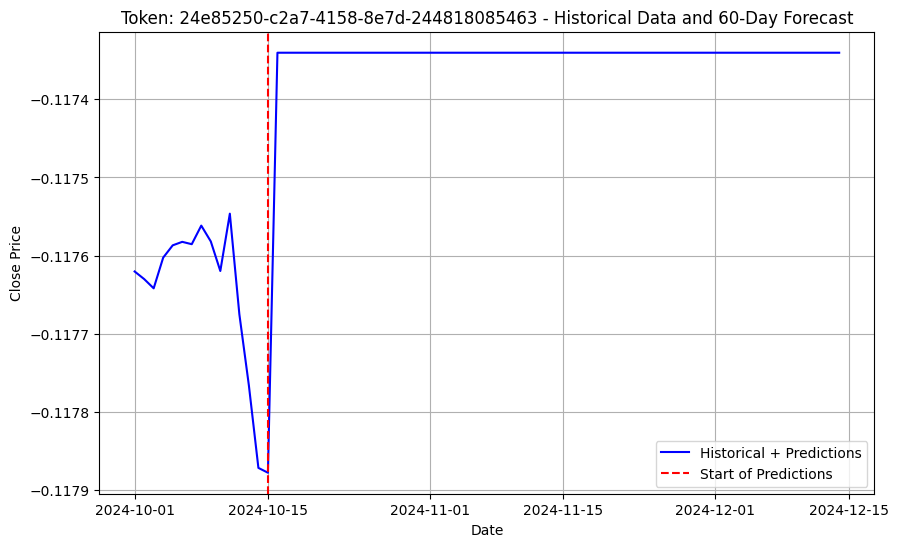

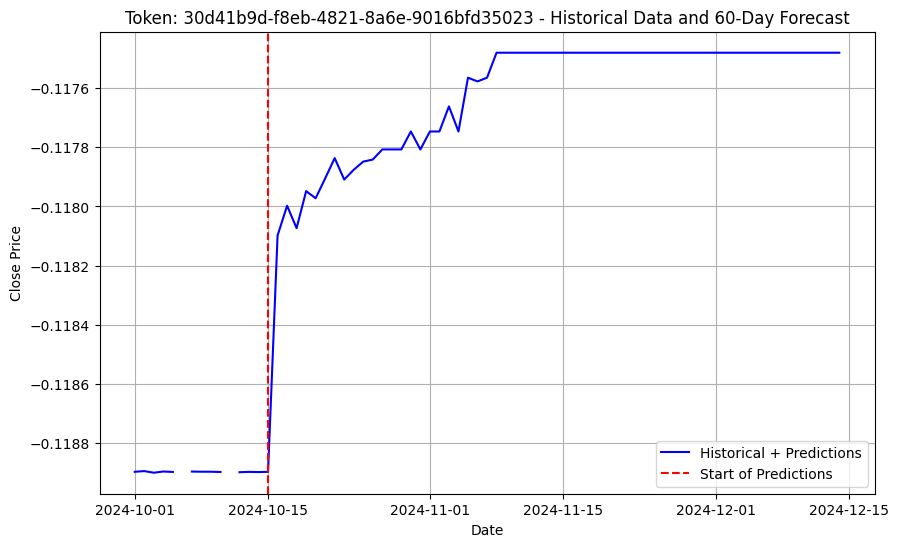

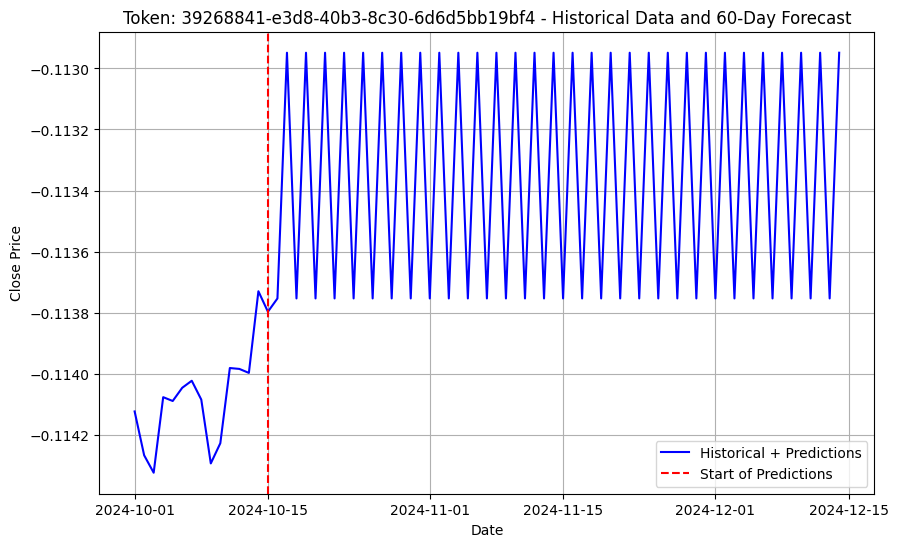

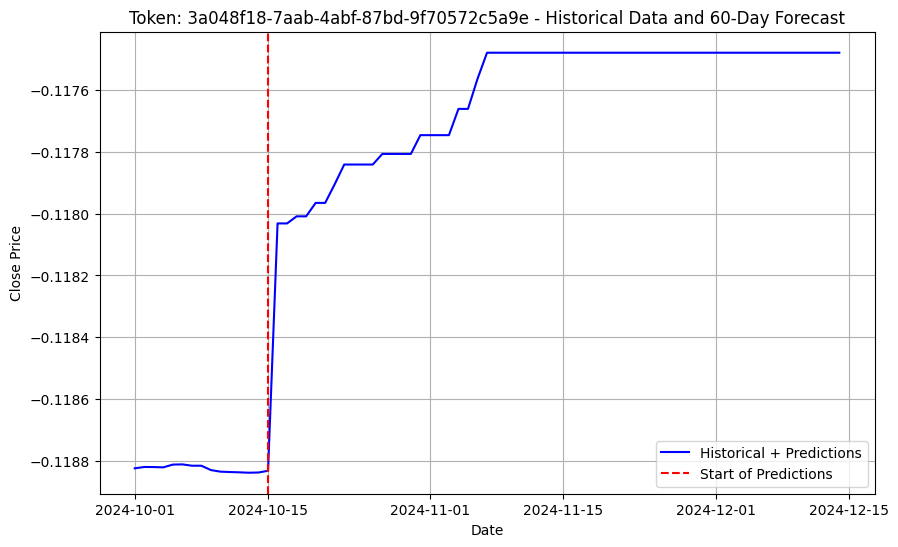

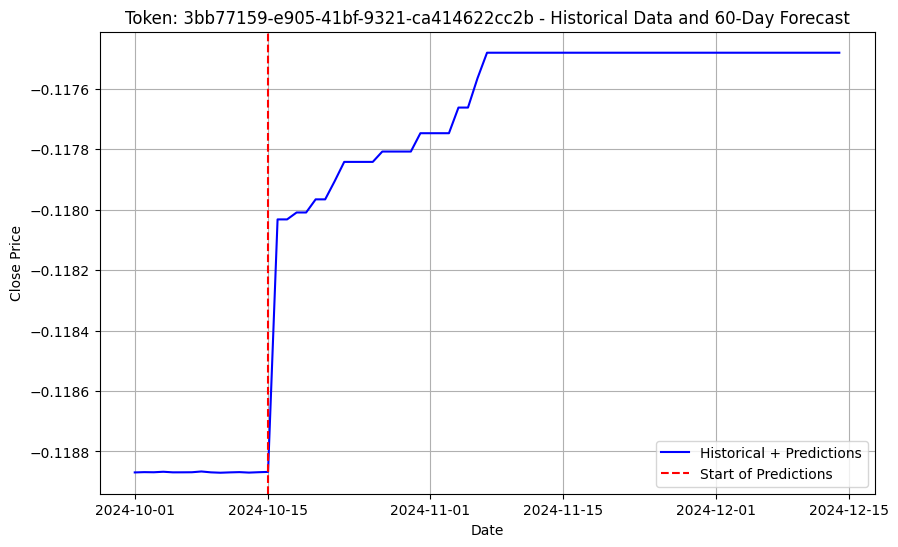

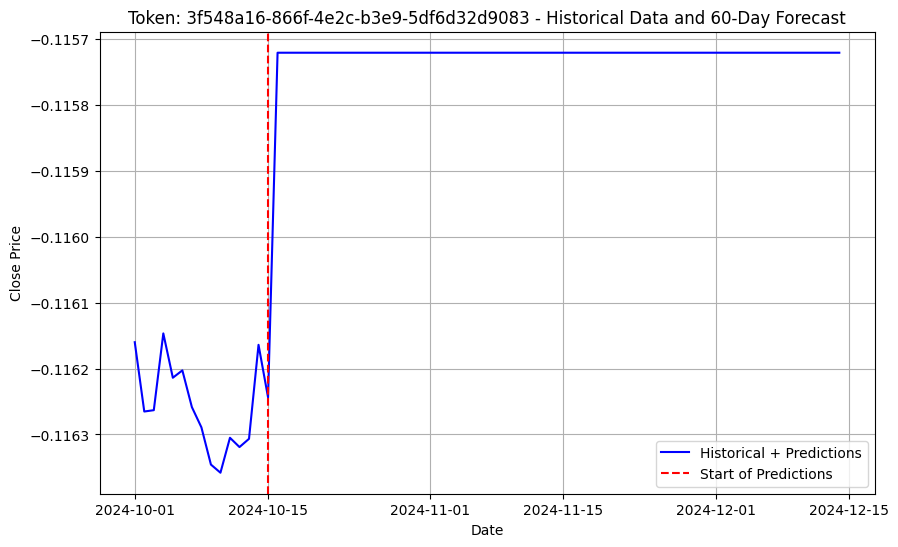

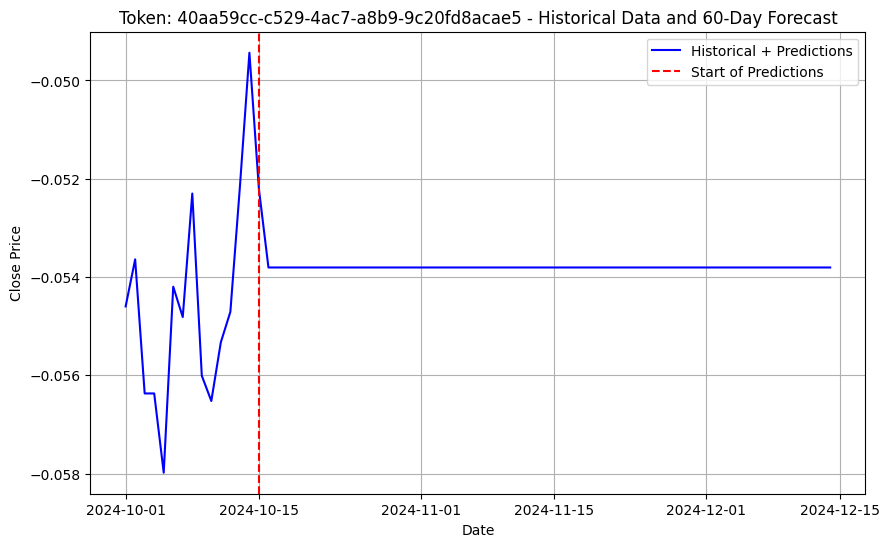

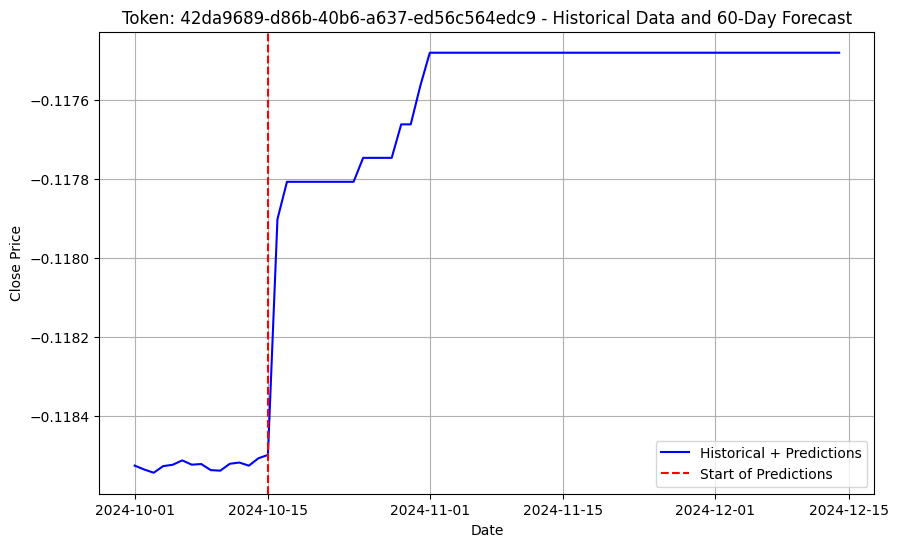

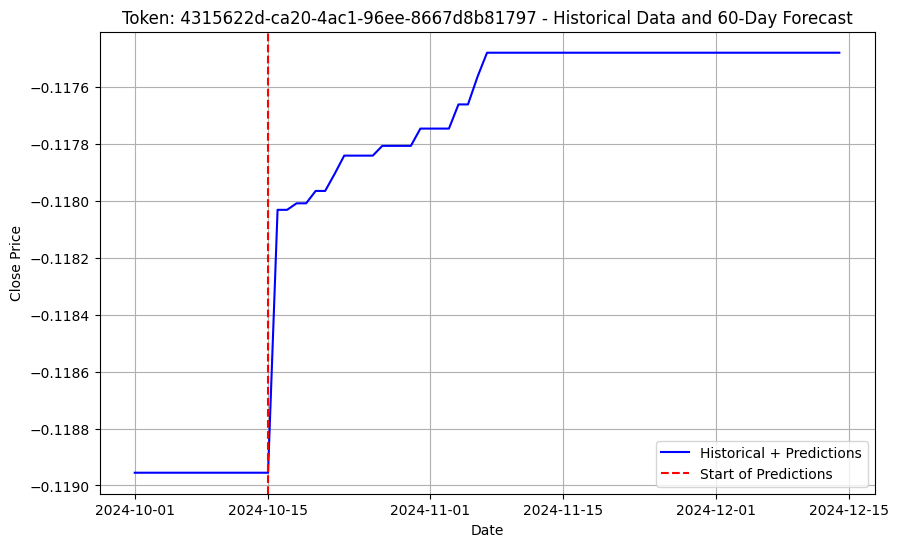

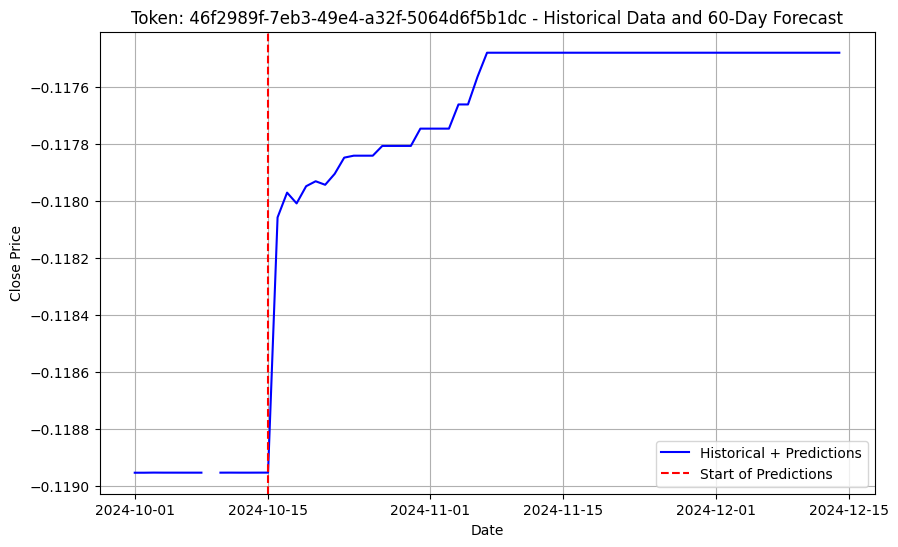

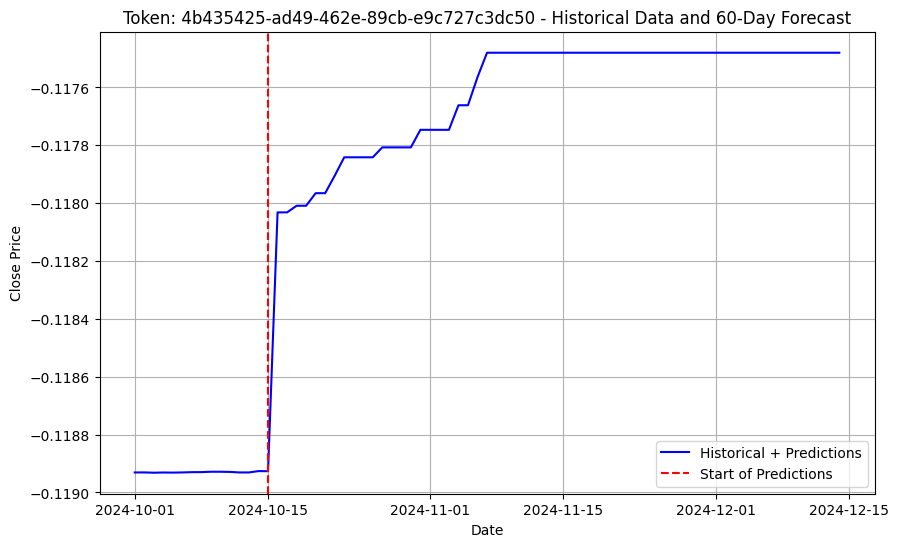

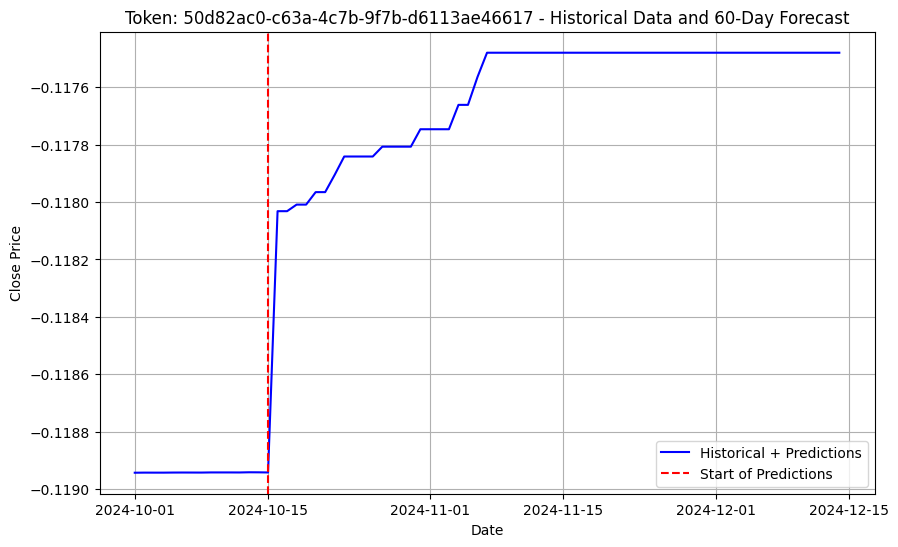

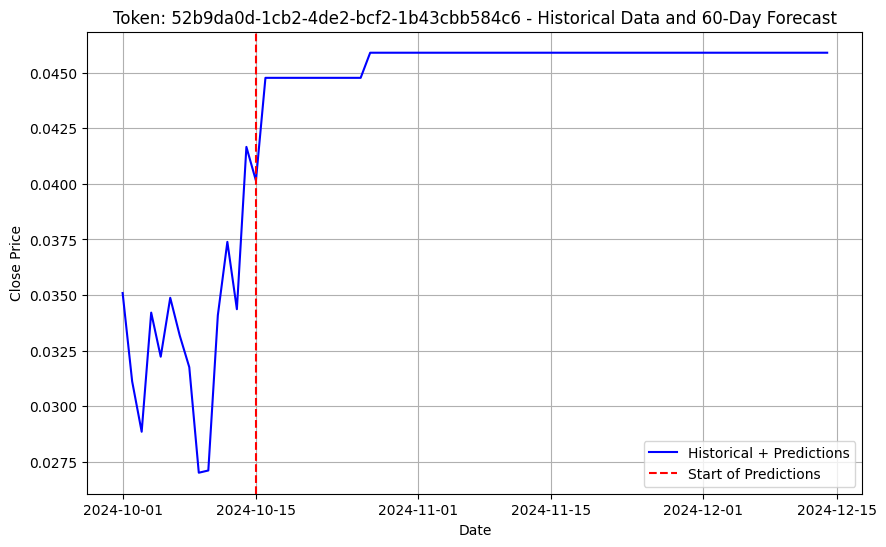

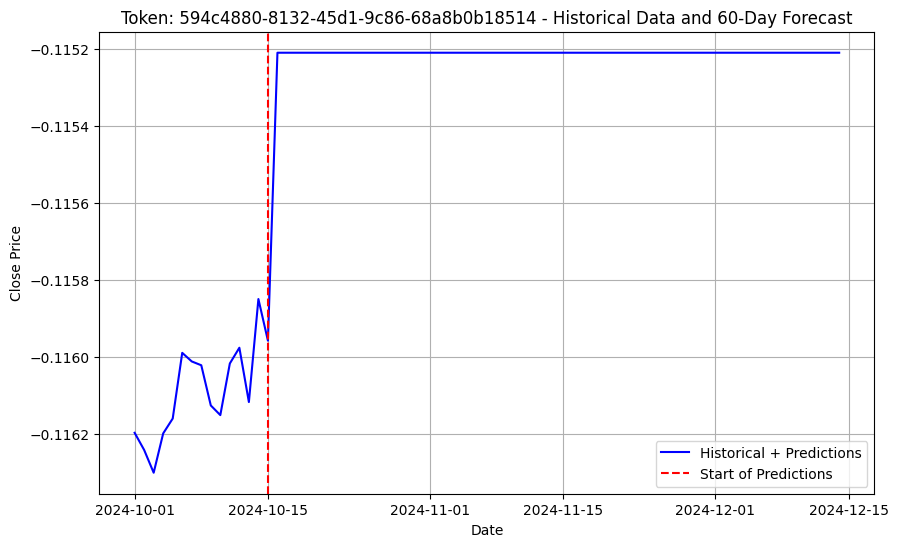

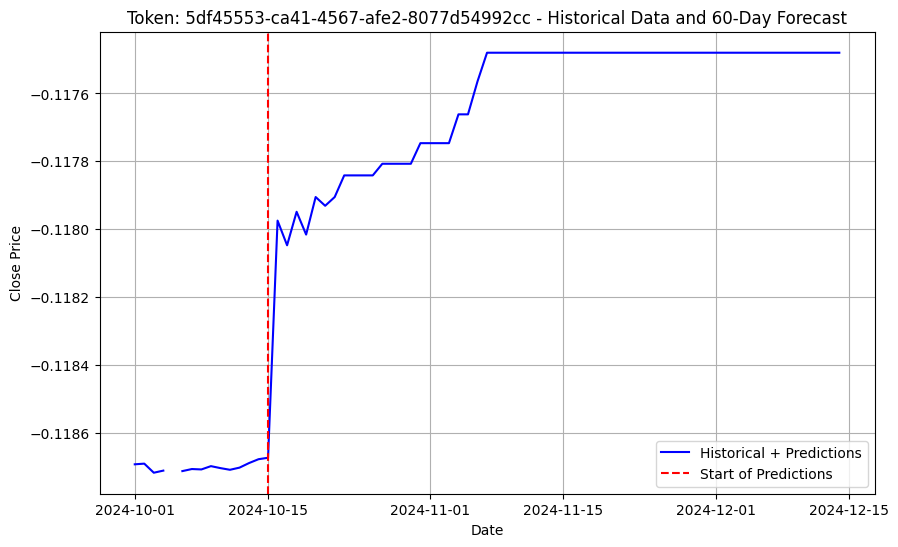

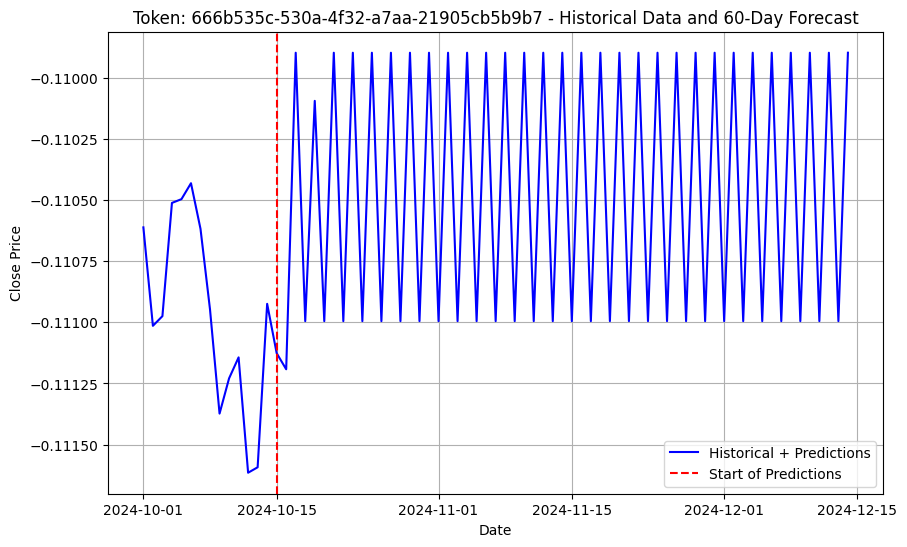

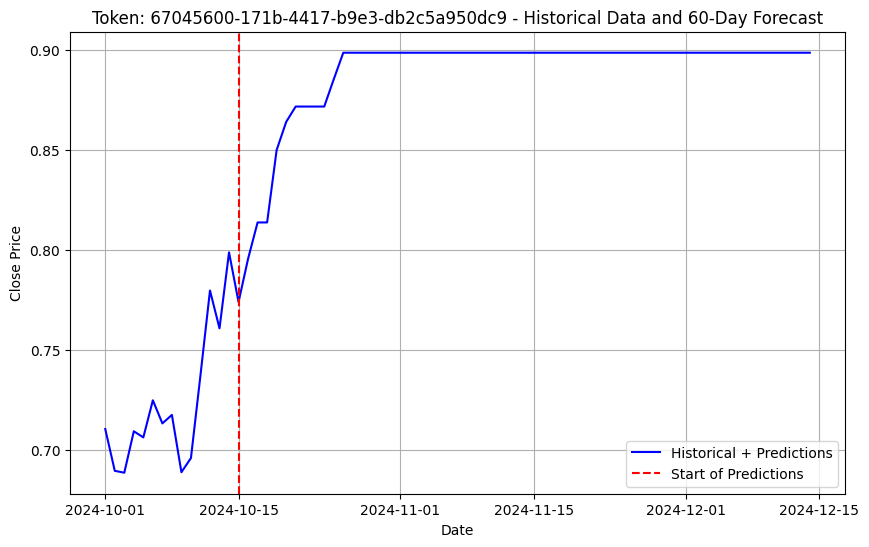

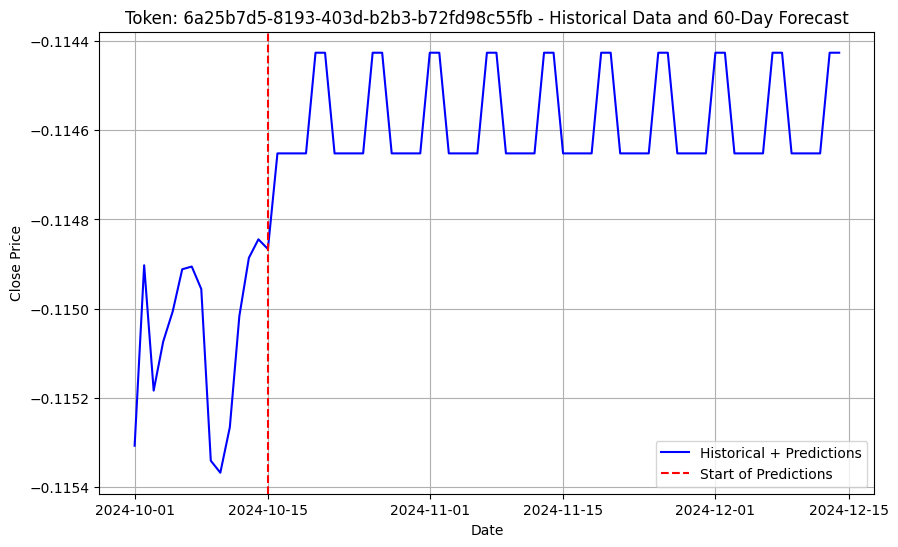

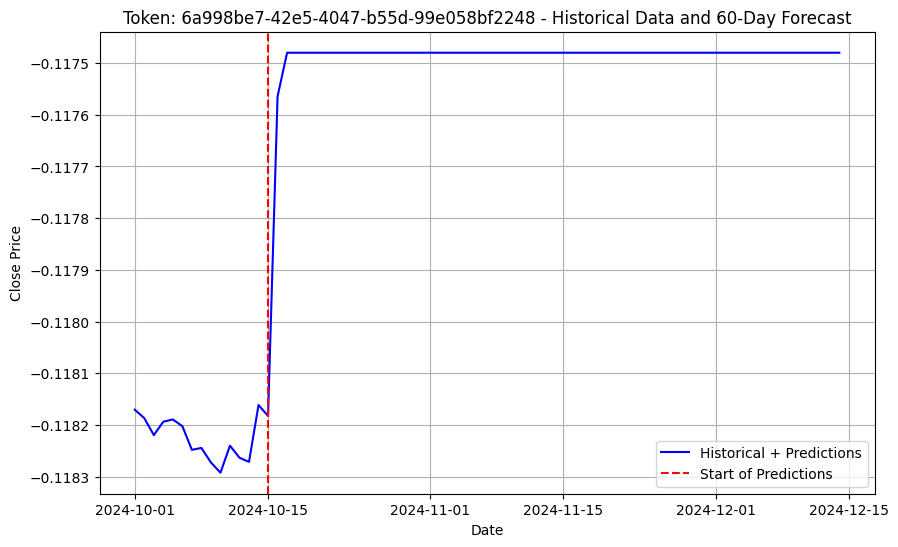

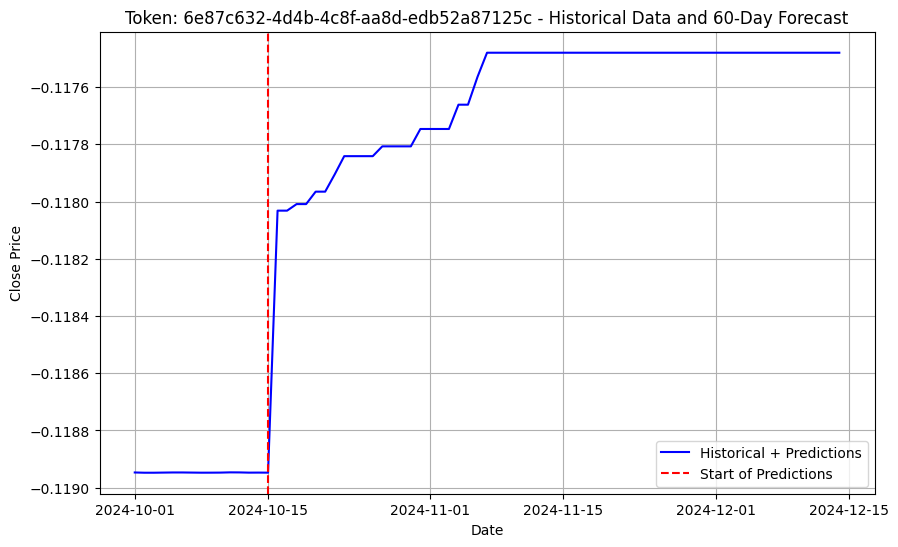

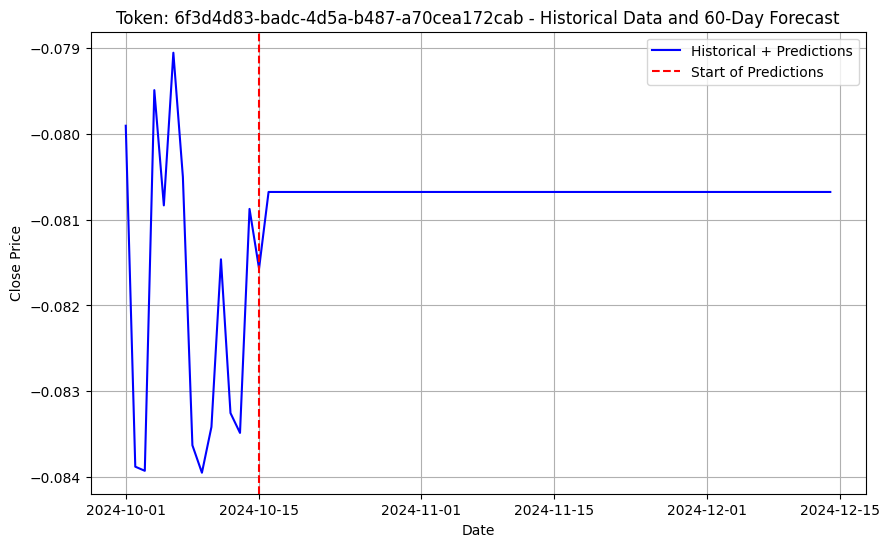

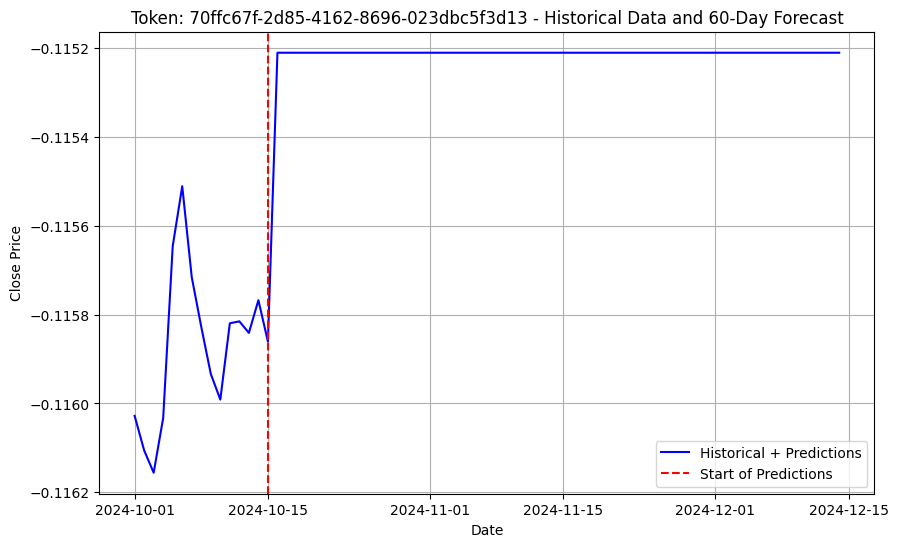

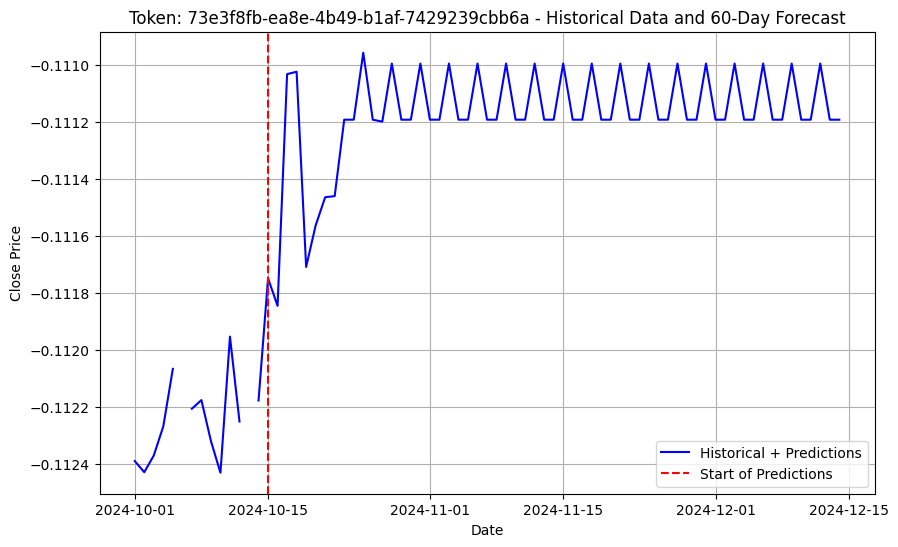

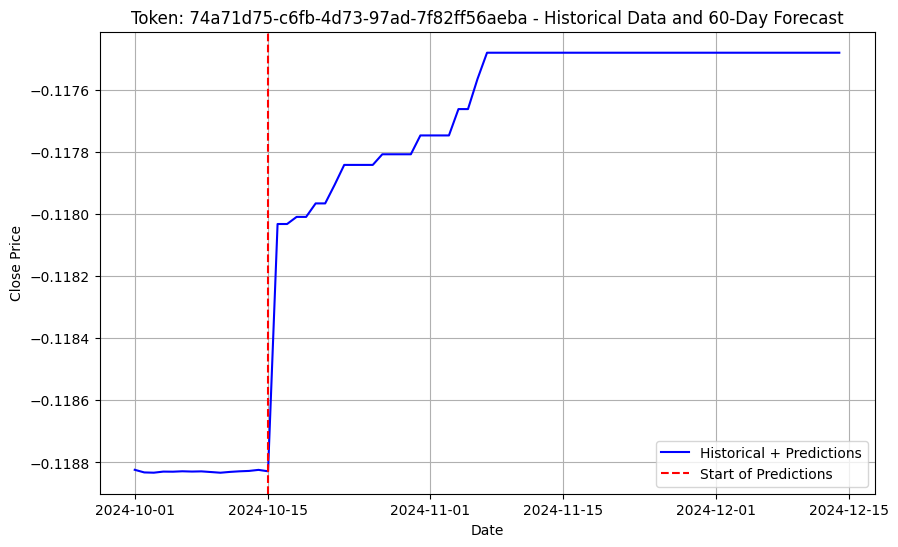

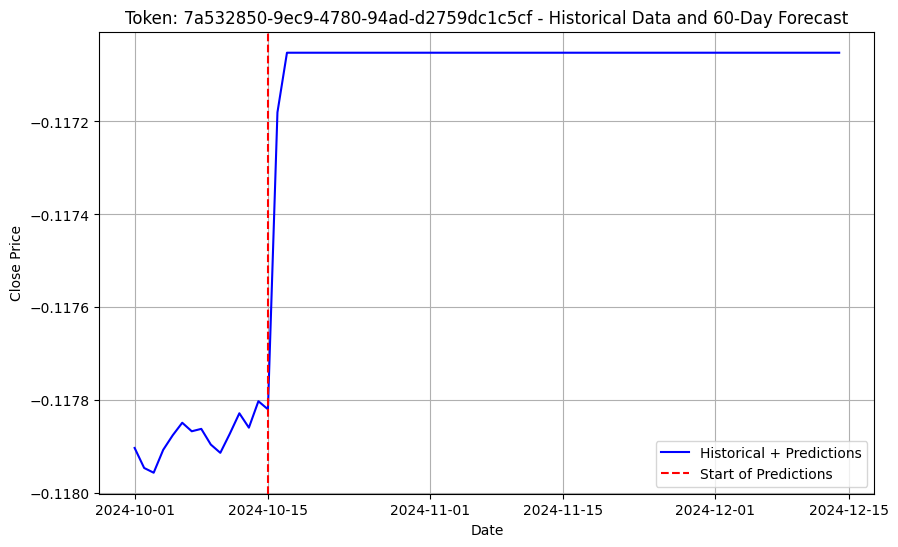

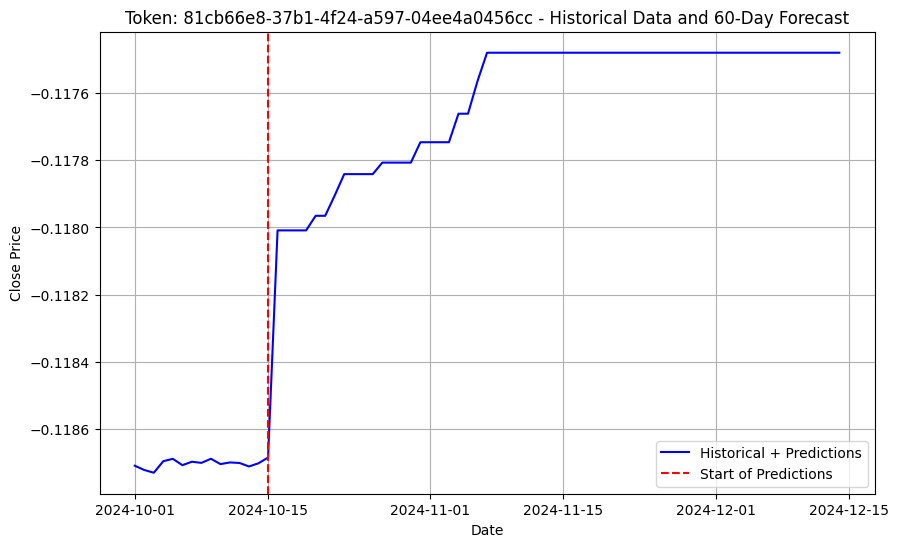

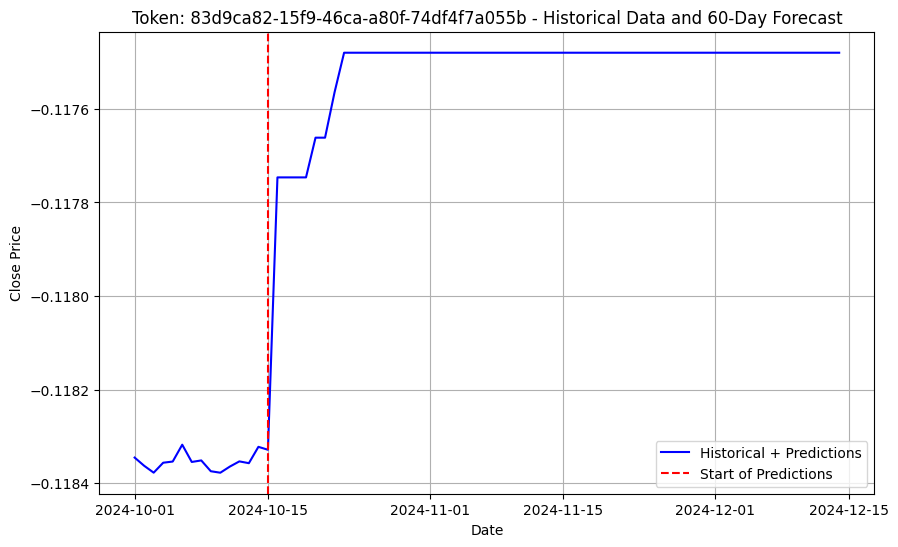

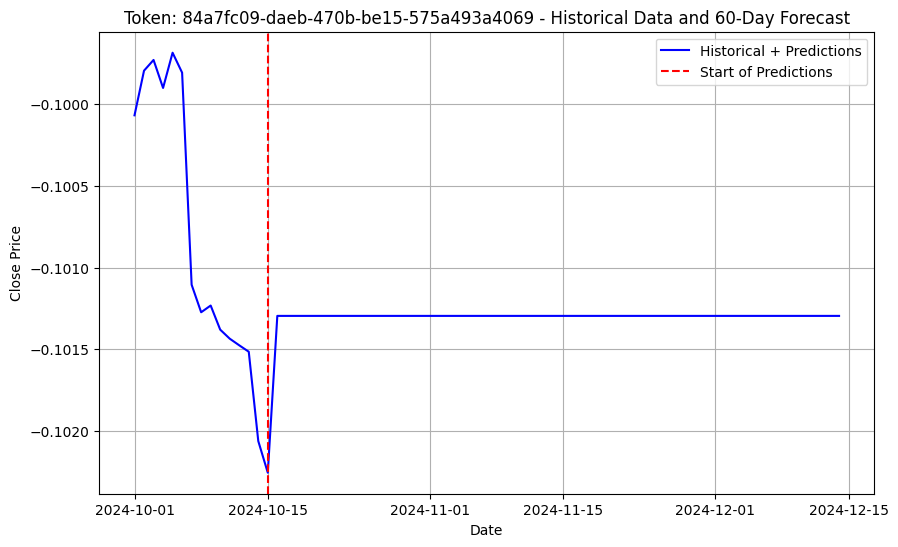

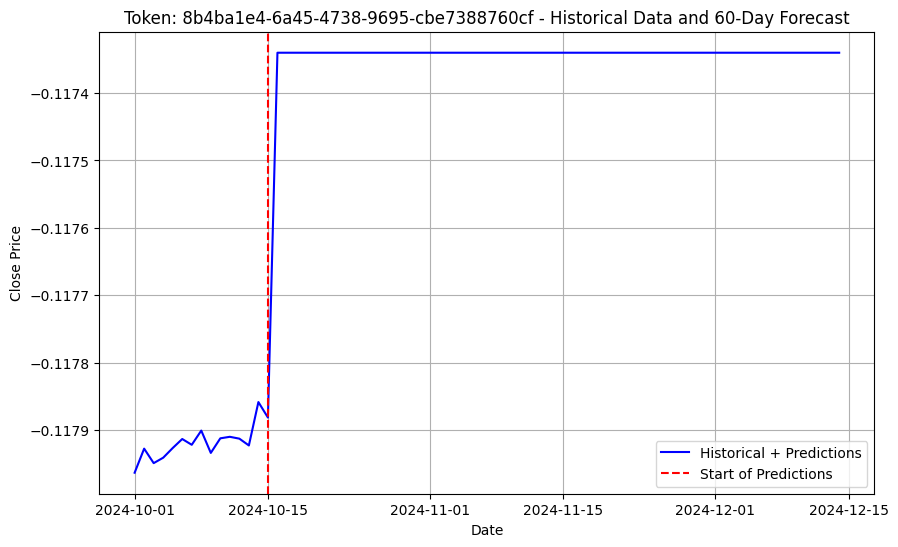

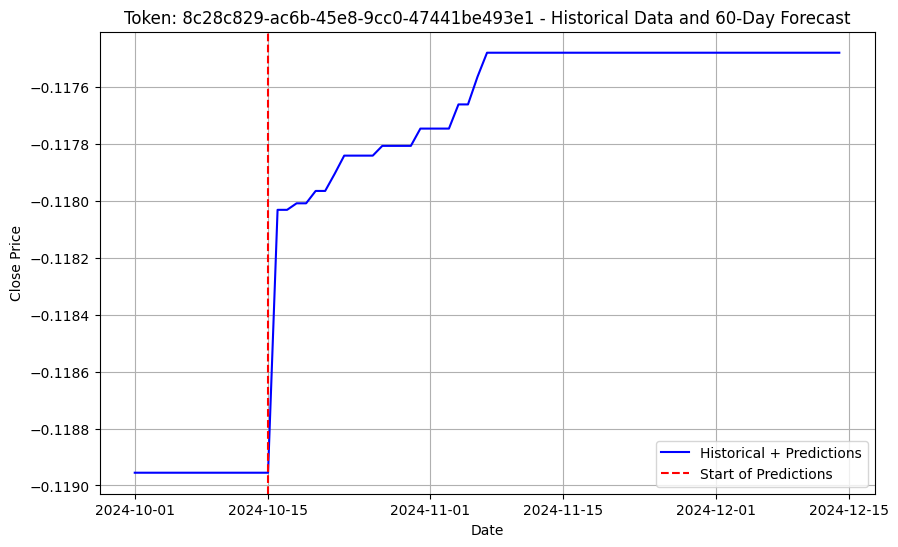

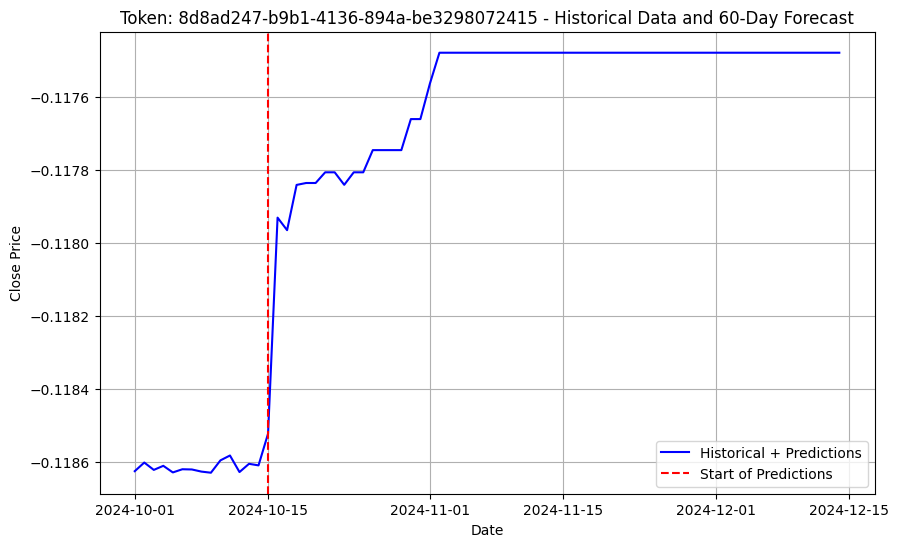

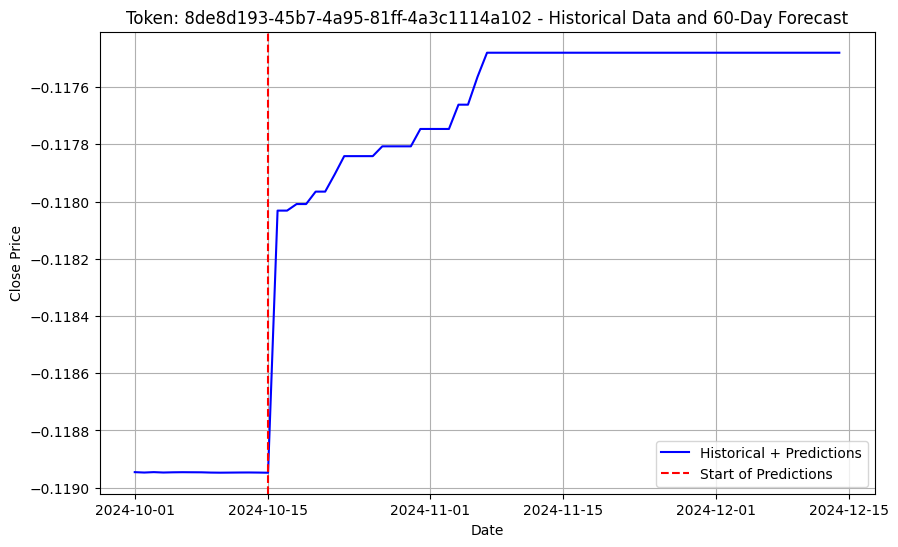

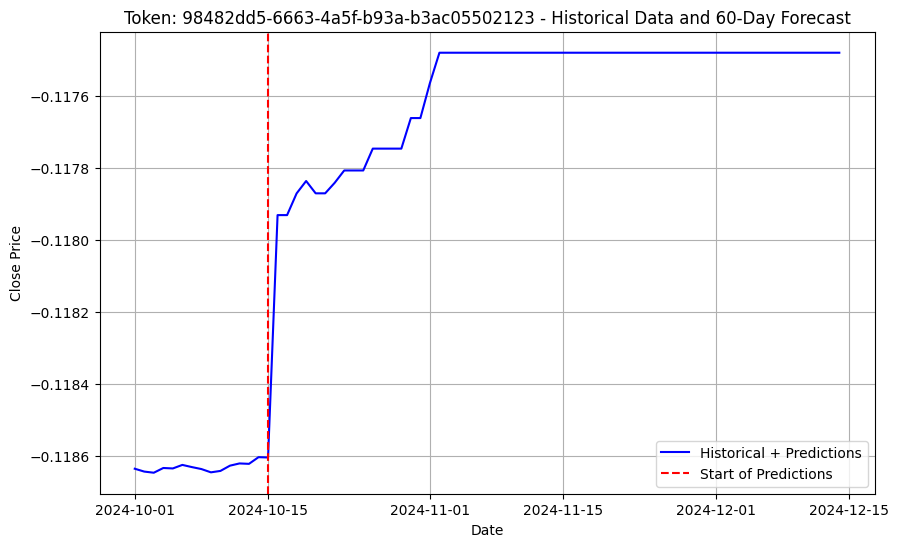

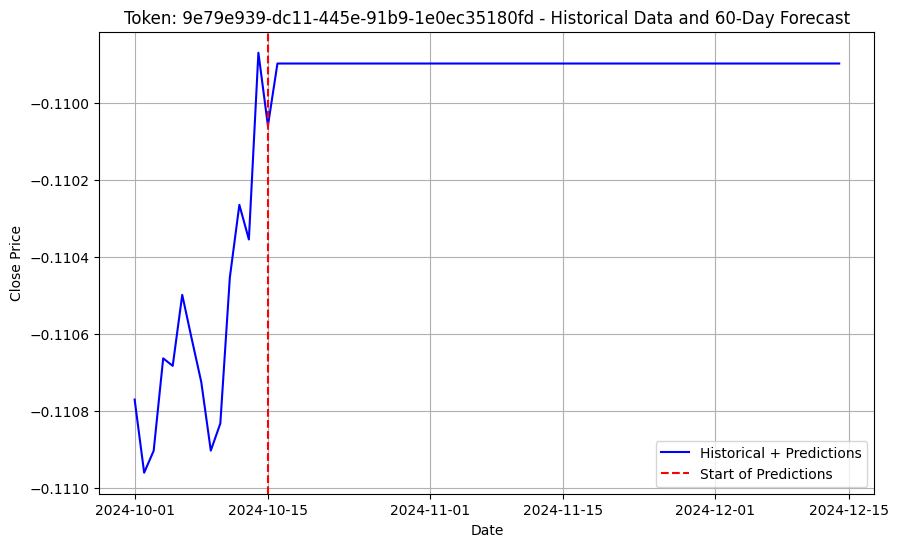

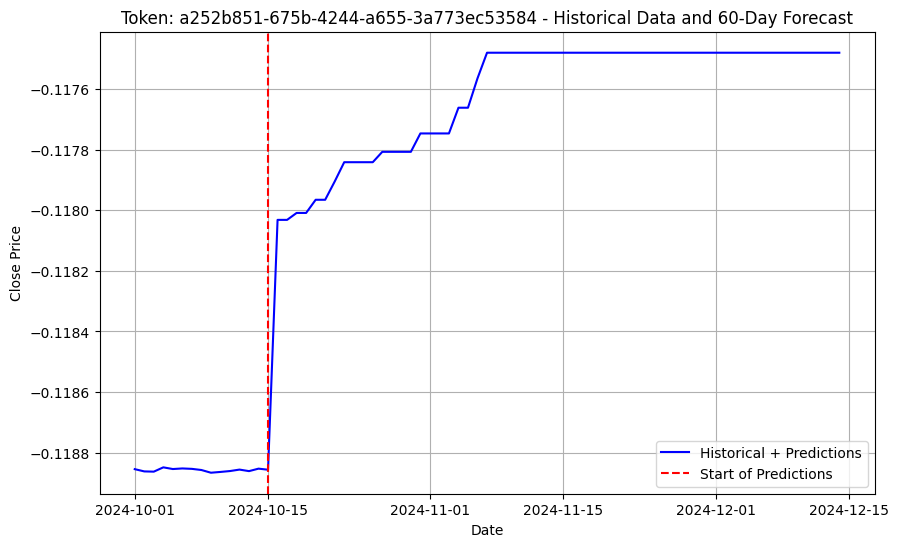

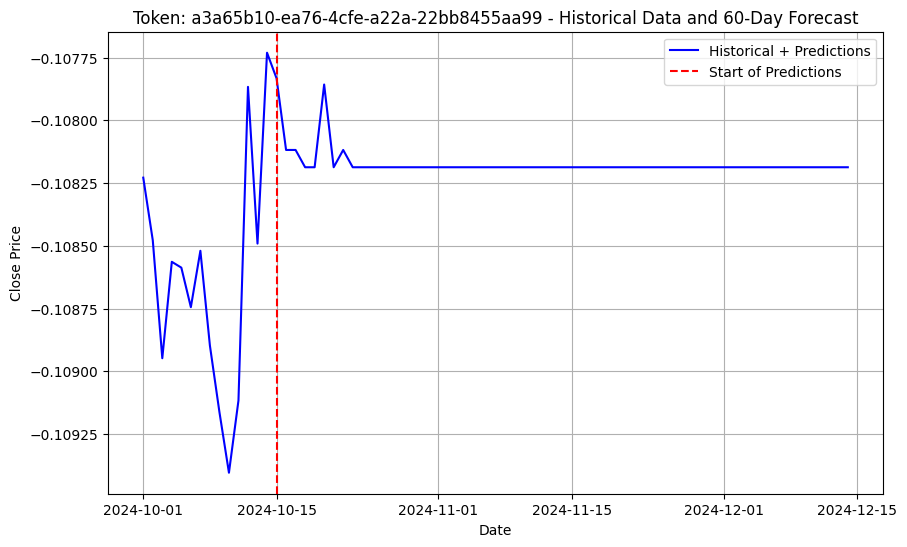

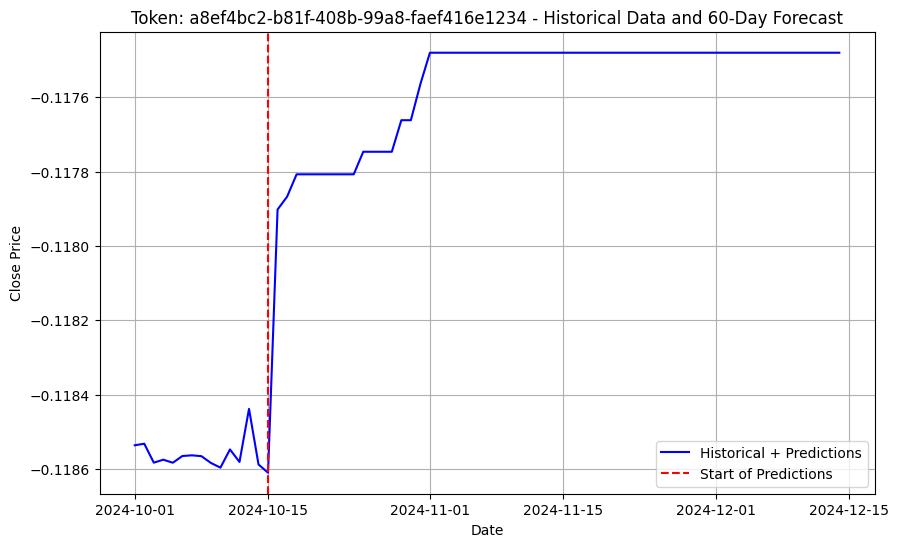

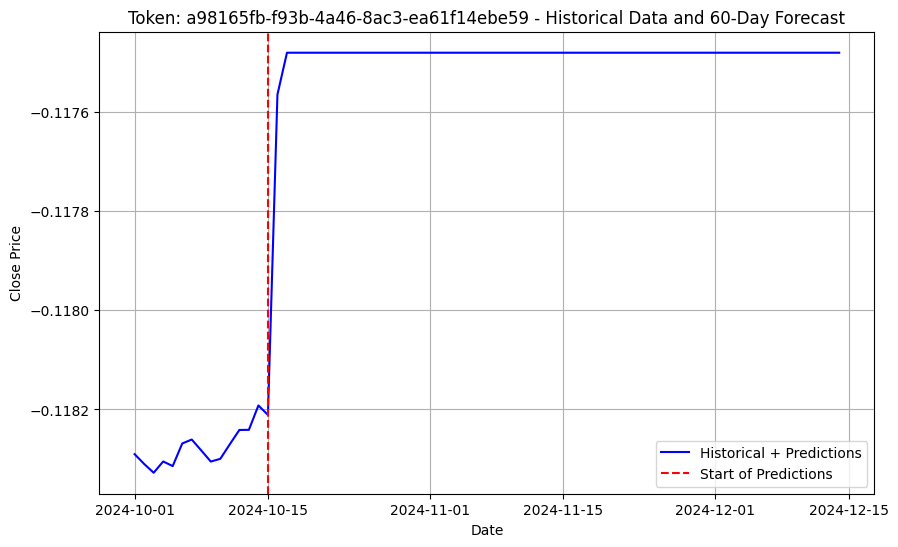

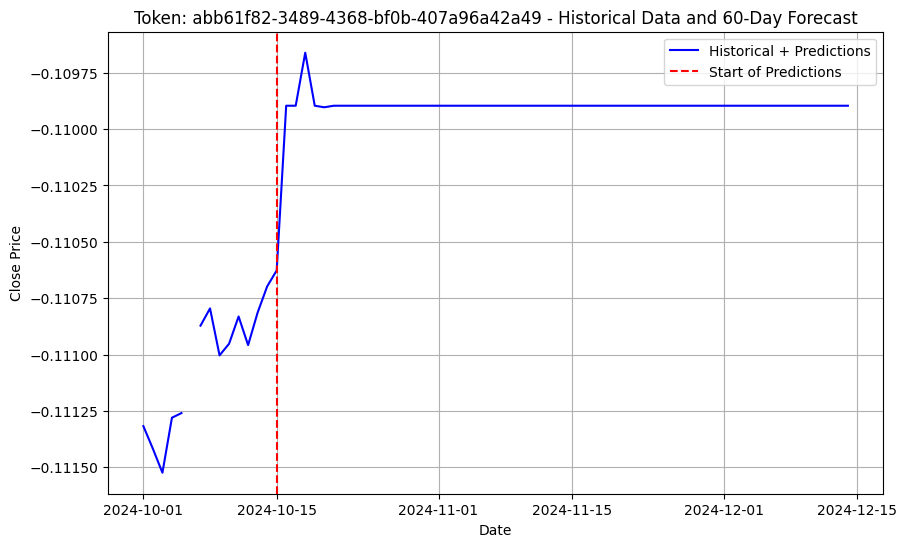

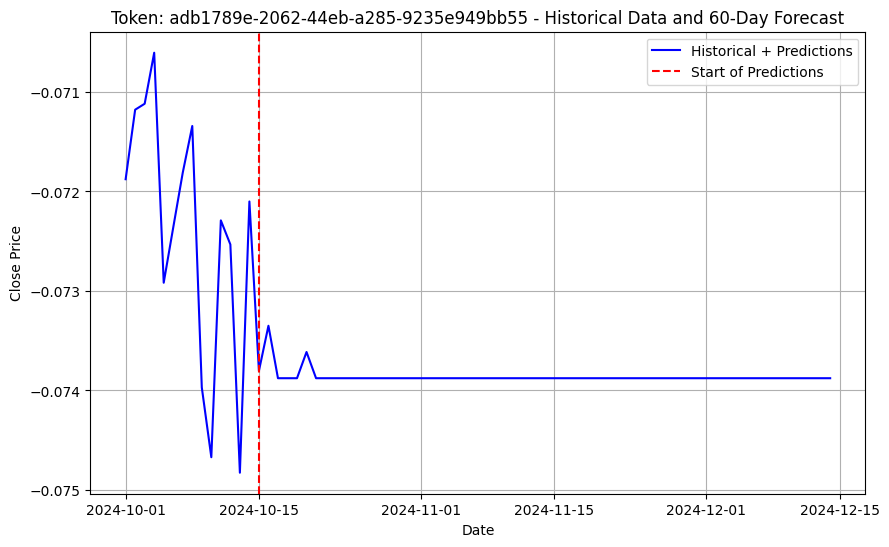

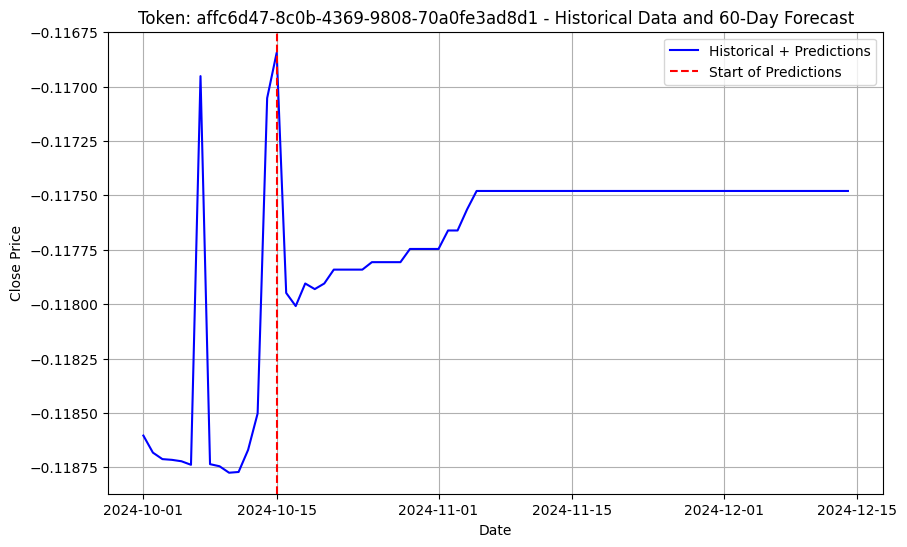

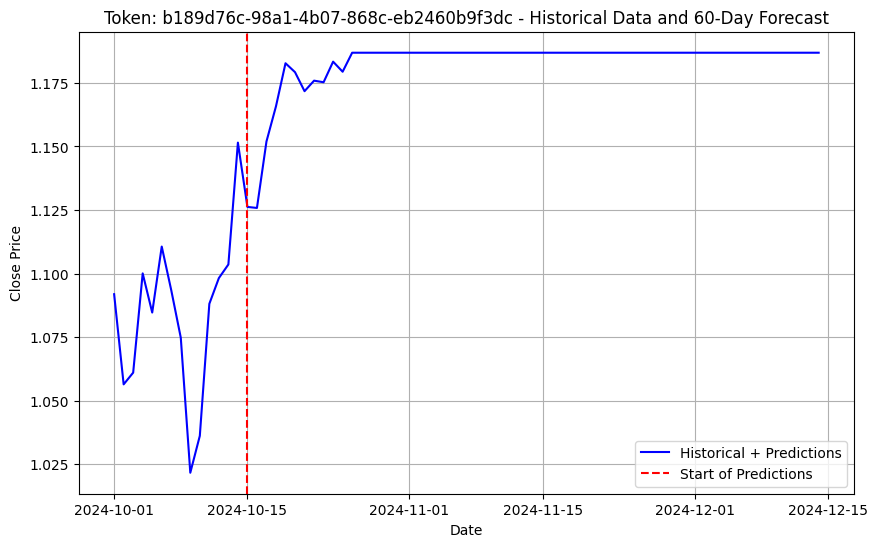

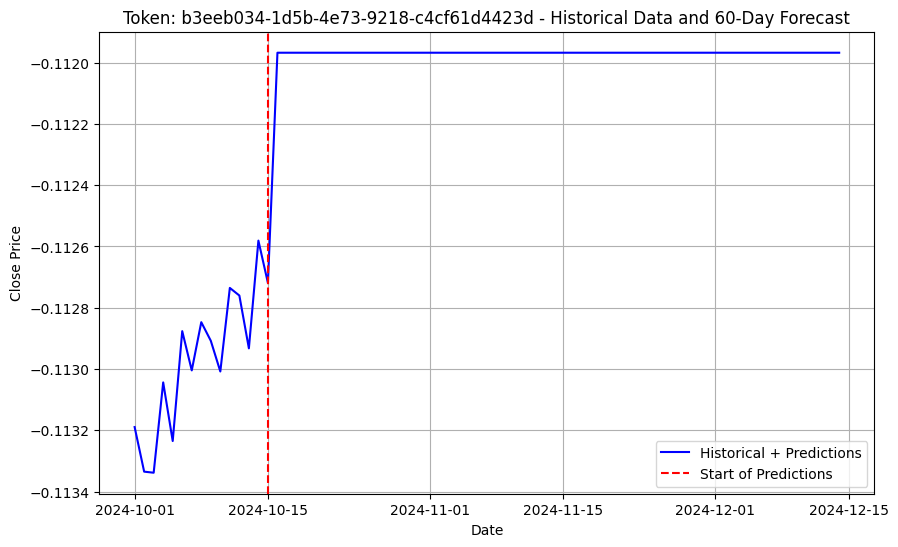

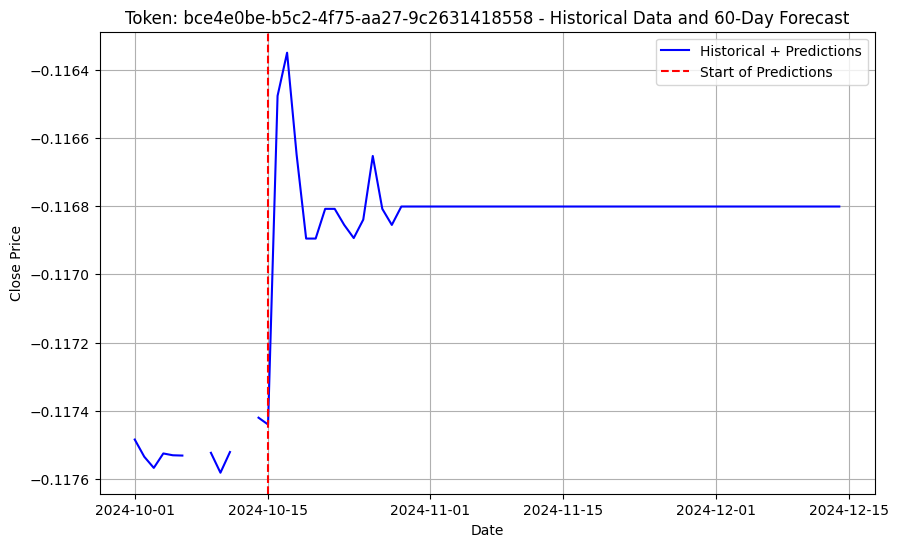

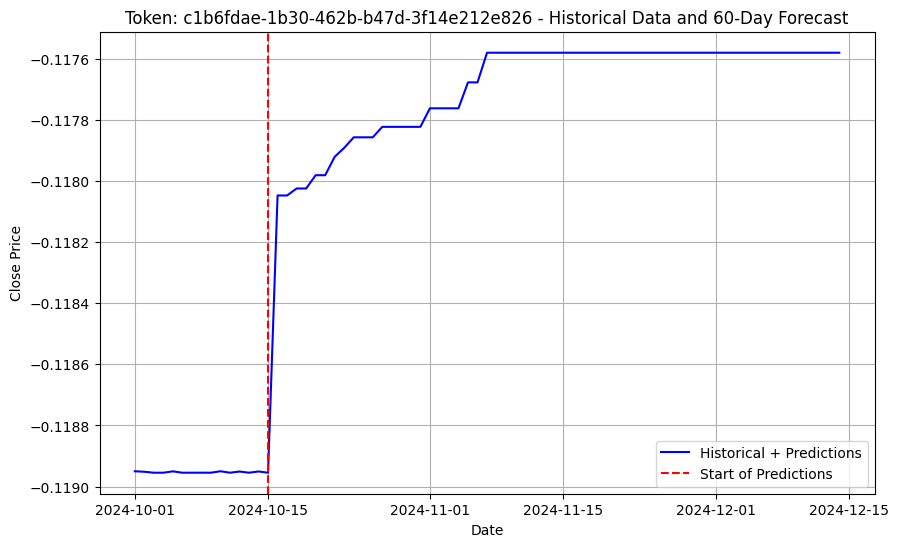

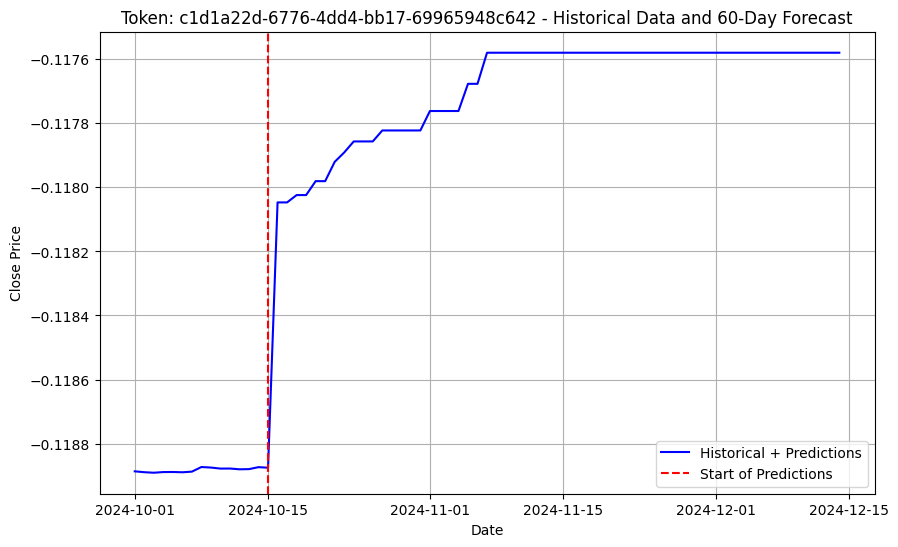

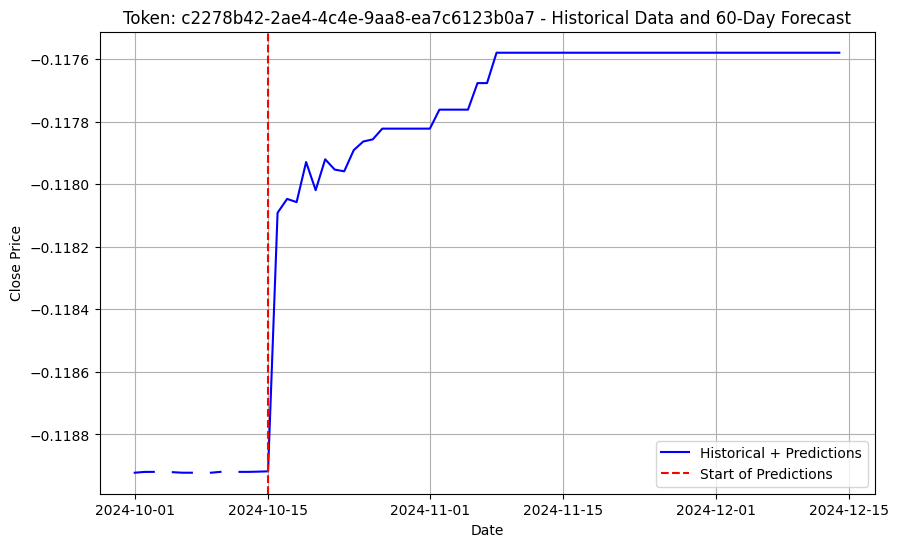

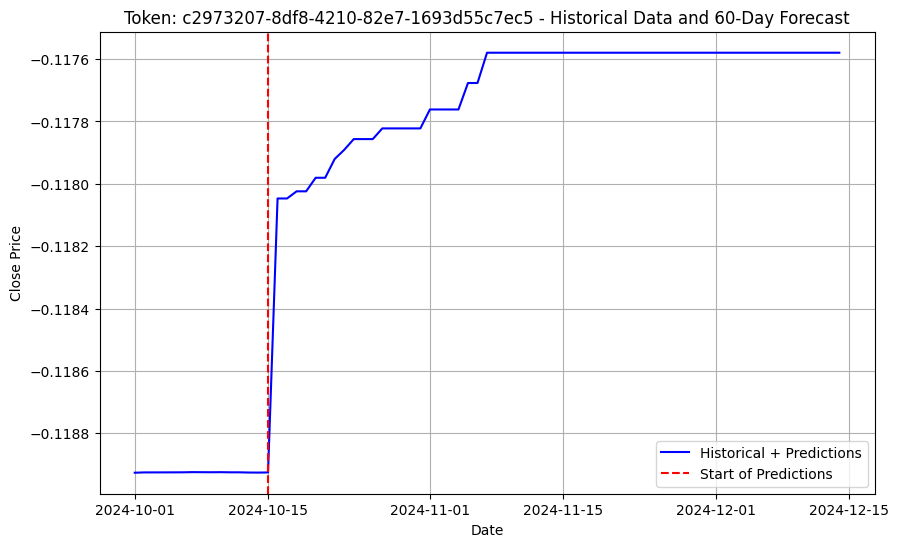

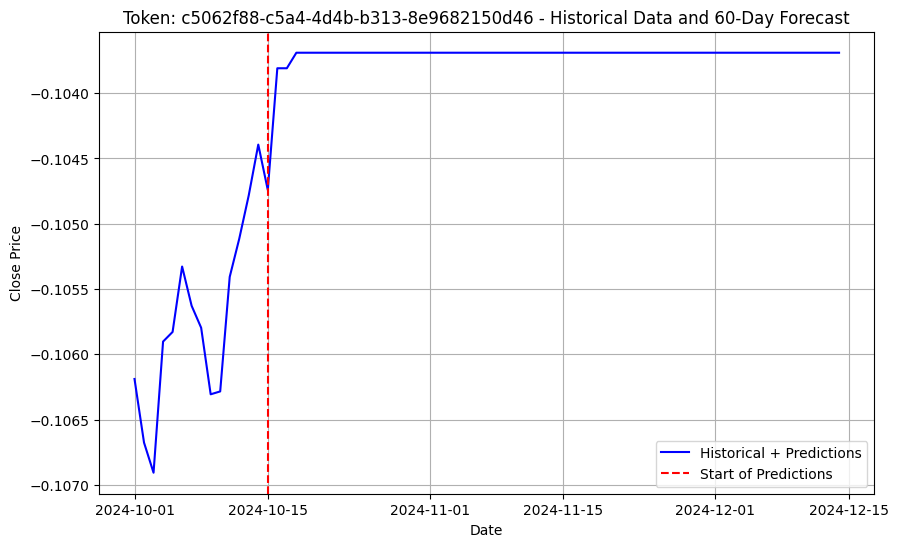

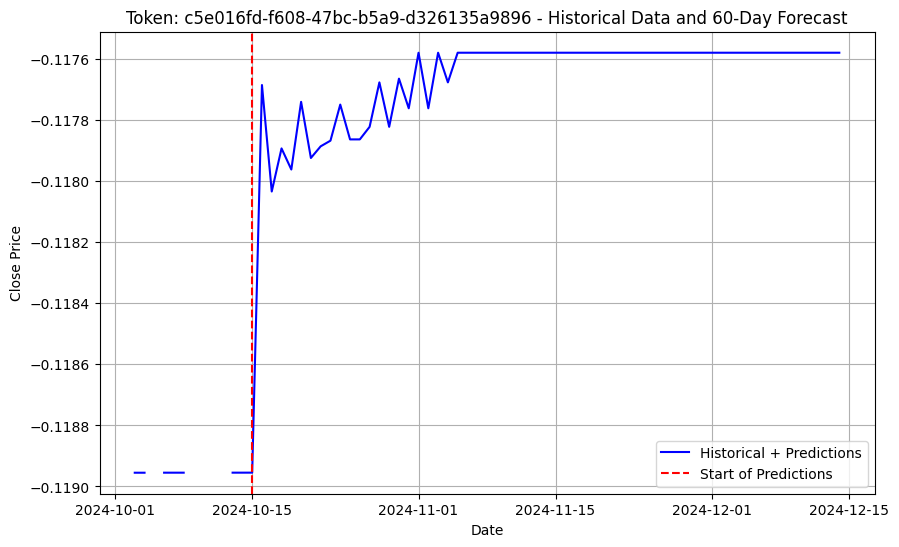

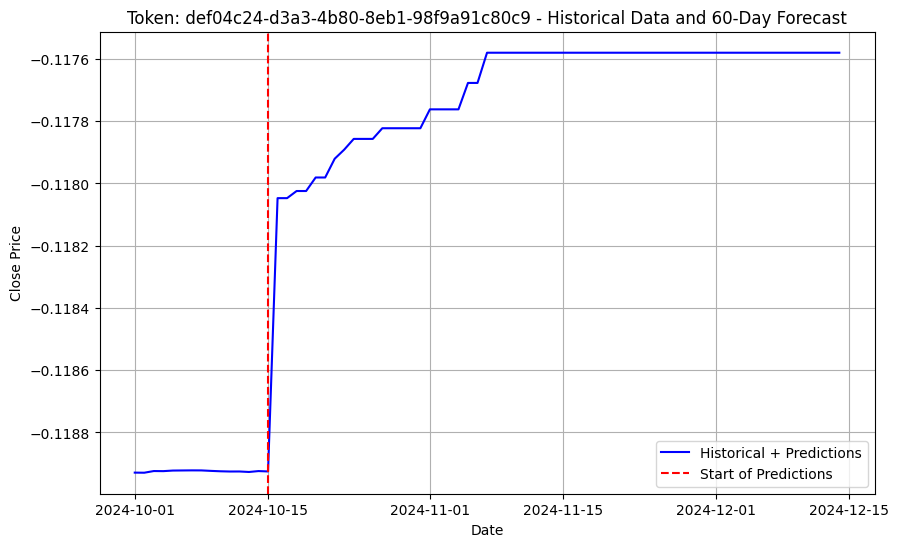

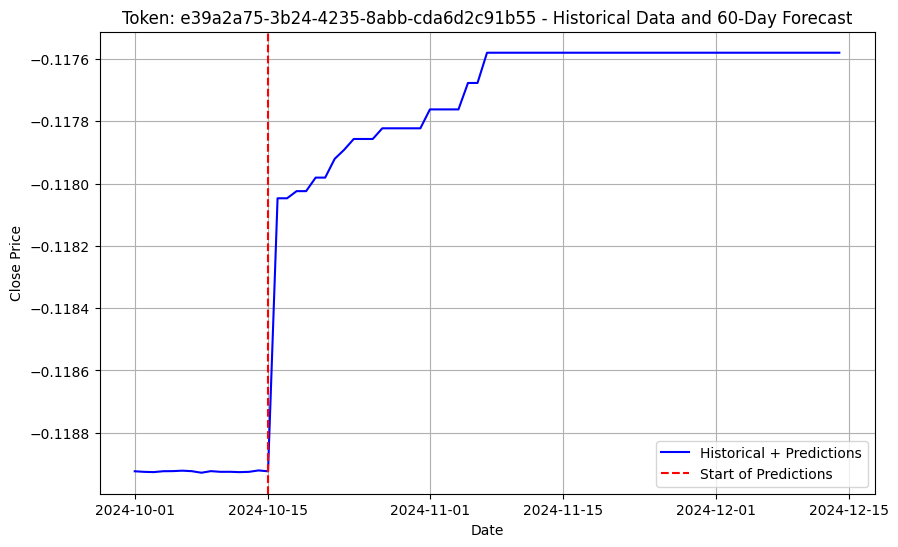

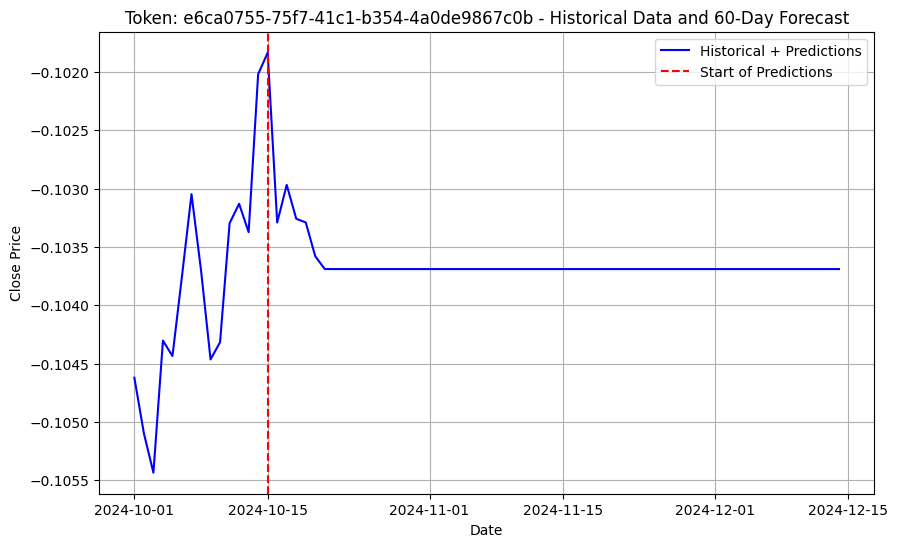

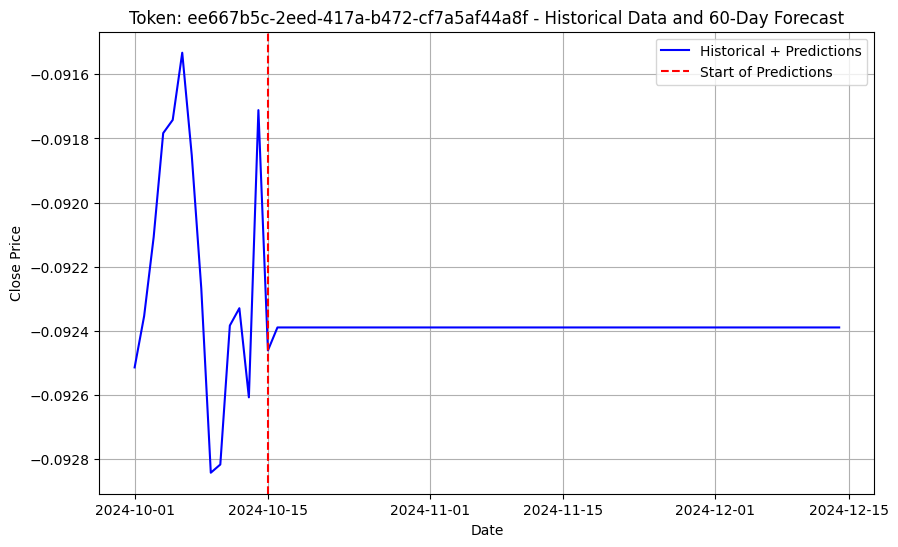

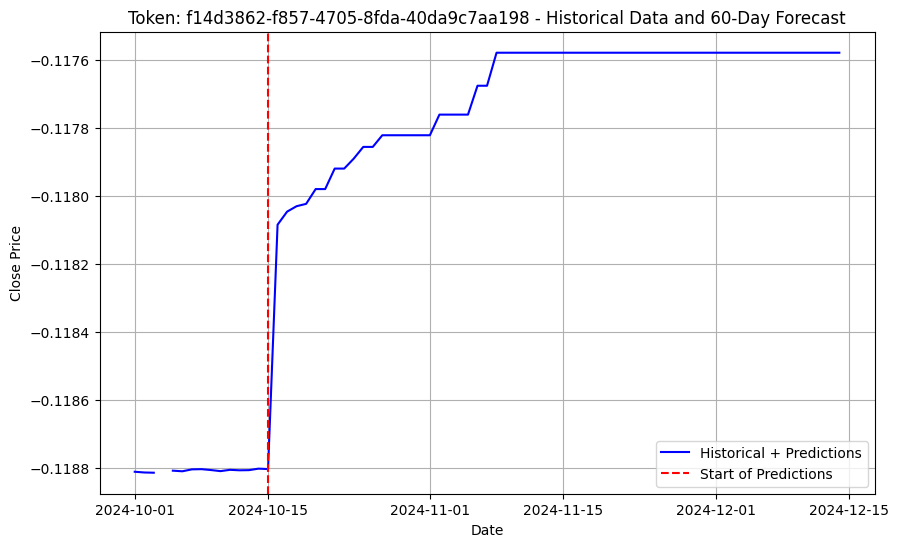

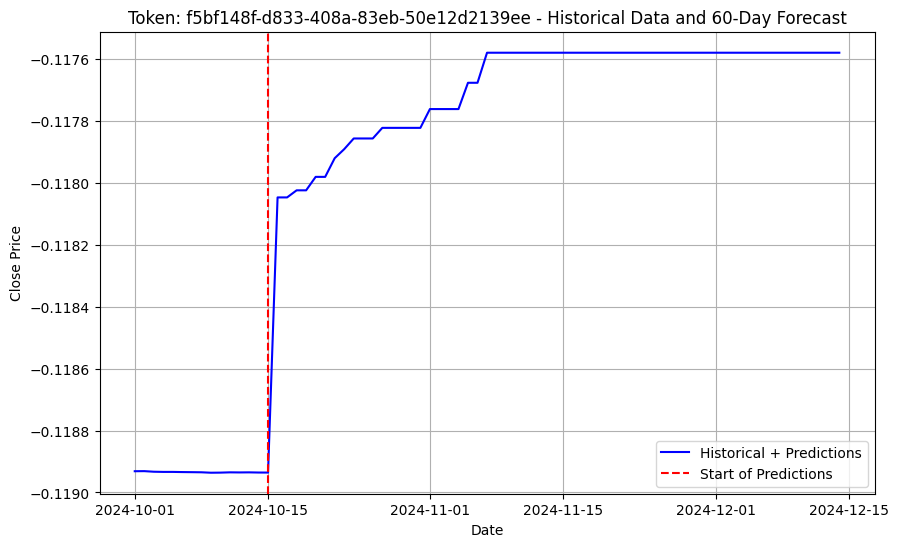

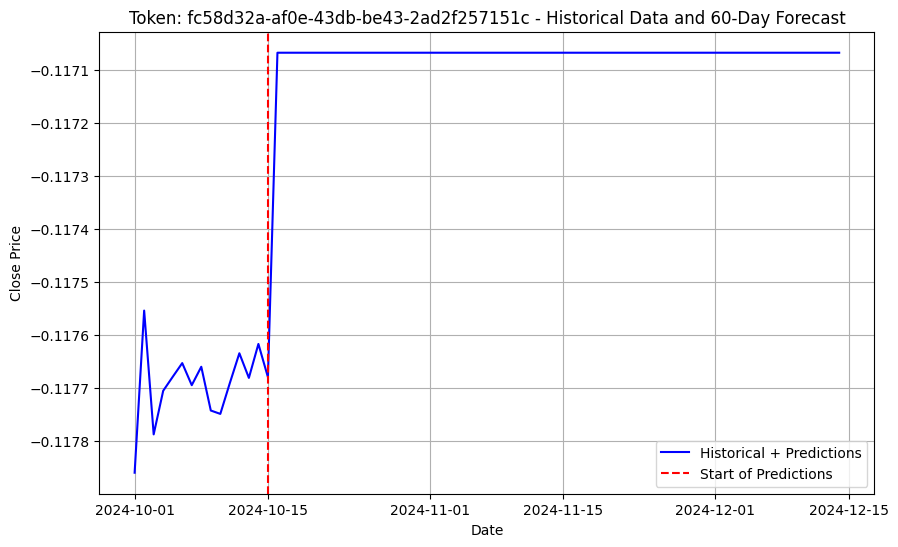

In [43]:
tokens = series_dict.keys()
for token_id, historical_data in series_dict['close'].items():
    # Extract the historical data for the token
    historical_data = historical_data  # historical close prices
    
    # Create a timeline for the predictions (future dates after the last historical data point)
    last_date = historical_data.index[-1]
    future_dates = pd.date_range(start=last_date, periods=steps_ahead+1, freq='D')[1:]  # Skip the last date
    
    # Get the predicted values for the token
    if token_id in predictions_x_days.columns:
        predictions = pd.Series(predictions_x_days[token_id], index=future_dates, name='Predictions')
    else:
        continue
    
    # Concatenate historical data with predictions
    combined_data = pd.concat([historical_data, predictions])
    
    # Filter data since 2024-08-01
    combined_data = combined_data[combined_data.index >= '2024-10-01']
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(combined_data.index, combined_data, label='Historical + Predictions', color='blue')
    plt.axvline(x=last_date, color='red', linestyle='--', label='Start of Predictions')
    plt.title(f'Token: {token_id} - Historical Data and 60-Day Forecast')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    
    # Display plot
    plt.show()